In [0]:
import cv2
import keras
from keras.activations import softmax, relu
from keras.callbacks import EarlyStopping, TerminateOnNaN
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from random import shuffle
from sklearn.metrics import confusion_matrix
# import tensorflow as tf
import time
%matplotlib inline

# tf.__version__

List dir and create classes nomenclation

### Load images as test data and reshape to same size

In [0]:
print("\n",X.shape,"\n",y.shape)
quick_test_number, cols_per_row = 16, 4
ids = np.random.choice(np.arange(X.shape[0]),quick_test_number, replace=False)
rows, cols = (quick_test_number//cols_per_row), cols_per_row
if quick_test_number%cols_per_row != 0:
    rows += 1
print(rows,cols)
fig, axs = plt.subplots(rows,cols, figsize=(14,10))
col,row = 0,0
for id in ids:
#     print(id, X[id,:,:,:].shape)
    if col == 4:
        col = 0
        row += 1
    axs[row,col].imshow(X[id,:,:,0], cmap="gray", interpolation="bicubic")
    axs[row,col].set_title(class_dict[np.argmax(y[id])])
    col  += 1
fig.tight_layout()

NameError: ignored

([<matplotlib.axis.XTick at 0x256cb7be7f0>,
 <a list of 25 Text xticklabel objects>)

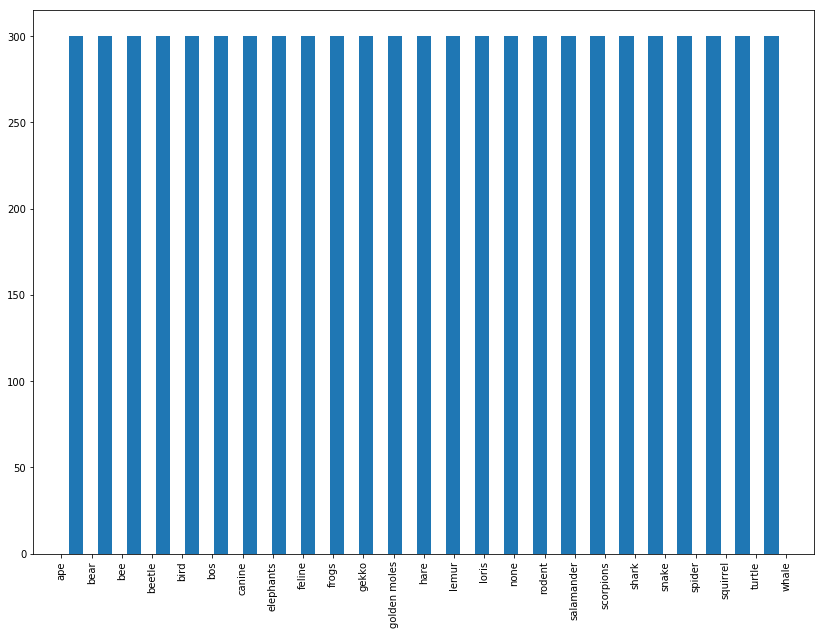

In [0]:
class_distrib = np.argmax(y, axis=1)
# print(class_distrib[-50:])
plt.figure(figsize=(14,10))
plt.hist(class_distrib, bins=len(class_list), rwidth=0.5)
plt.xticks(np.arange(len(class_list)),class_list, rotation="vertical")

(7500, 50, 50, 1) 7500 (1, 50, 50, 1)
(7500, 25) 7500 (1, 25)
(7500, 50, 50, 1) (7500, 25)
[22 13 15 ...  9  4  7]


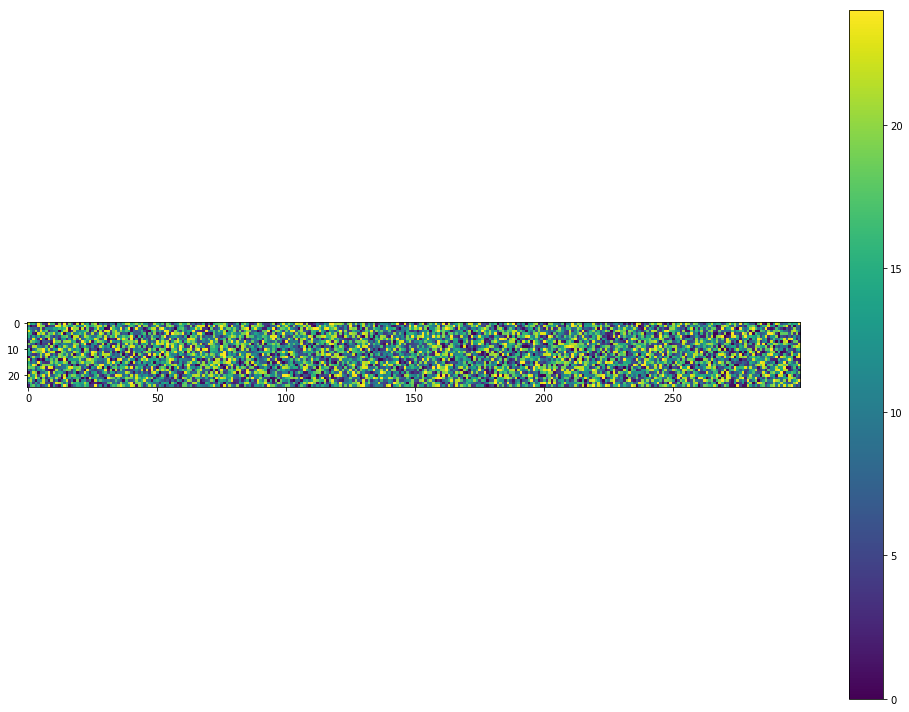

In [0]:
# shuffling of input data and target vector - before keras splits it in training and validation set
X_temp = np.split(X, X.shape[0], axis=0)
y_temp = np.split(y, y.shape[0], axis=0)
print(X.shape, len(X_temp), X_temp[0].shape)
print(y.shape, len(y_temp), y_temp[0].shape)

# create new, random order of sequences
sequence_order = np.random.choice(np.arange(len(X_temp)), len(X_temp), replace=False)
X_final = np.zeros_like(X)
y_final = np.zeros_like(y)
for index, sequence in enumerate(sequence_order):
    X_final[index,:,:,:] = X_temp[sequence]
    y_final[index,:] = y_temp[sequence]
print(X_final.shape, y_final.shape)
print(np.argmax(y_final, axis=1))

res = int(np.ceil(np.math.sqrt(y_final.shape[0])))
dist_matrix = np.reshape(np.argmax(y_final, axis=1),(len(class_list),batch_size_per_class))
# dist_matrix = np.zeros((res,res))

plt.figure(figsize=(14,10))
plt.imshow(dist_matrix)
plt.colorbar()
# plt.scatter(np.arange(y_final.shape[0]), np.argmax(y_final, axis=1))
plt.tight_layout()
plt.show()

In [0]:
print(np.arange(y_final.shape[0]))
print(np.argmax(y_final, axis=1))

[   0    1    2 ... 7497 7498 7499]
[22 13 15 ...  9  4  7]


In [0]:
def show_random_sequences(X, y, amount, classes):
    plt.figure(figsize=(14, 20))
    for ind in range(amount): # only 10 first images
        rand_id = np.random.choice(X.shape[0], replace=False)
        plt.subplot(amount//2,2,ind+1)
        plt.imshow(X[rand_id,:,:,0], cmap="gray", interpolation="bicubic")
        plt.title("{}: {}".format(rand_id, classes[np.argmax(y[rand_id,:])], y[rand_id,:]))
    # print("w: {} | h: {}".format(width, height))
    plt.tight_layout()
    
show_random_sequences(X,y,10, class_list)
print("----")
show_random_sequences(X_final,y_final,10, class_list)

NameError: ignored

# Option to save and load matrices X & y

In [0]:
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import time
import json

In [0]:
from google.colab import drive
drive.mount('/gdrive')

# files
x_file = "../gdrive/My Drive/Colab Notebooks/new_matrix_X.npy"
y_file = "../gdrive/My Drive/Colab Notebooks/new_matrix_y.npy"
dict_file = "../gdrive/My Drive/Colab Notebooks/new_dict.npy"

option_save = False
if option_save:
    np.save(x_file, X_final)
    np.save(y_file, y_final)
    np.save(dict_file, class_dict)
else:
    X_final = np.load(x_file)
    y_final = np.load(y_file)
    with open(dict_file,"r") as f:
        class_list = json.load(f)
    f.close()
    class_stats = pd.DataFrame(data={"classes":class_list})
    class_dict = class_stats["classes"].to_dict()
#     class_dict = {0: 'ape', 1: 'bear', 2: 'bee', 3: 'beetle', 4: 'bird',
#                   5: 'bos', 6: 'canine', 7: 'elephants', 8: 'feline', 9: 'frogs',
#                   10: 'gekko', 11: 'golden moles', 12: 'hare', 13: 'lemur', 14: 'loris',
#                   15: 'none', 16: 'rodent', 17: 'salamander', 18: 'scorpions', 19: 'shark', 
#                   20: 'snake', 21: 'spider', 22: 'squirrel', 23: 'turtle', 24: 'whale'}    
    
# define stuff
width, height = 50,50

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## Build CNN with keras

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.5,
                             shear_range=0.2,
                             rotation_range=20,
                             horizontal_flip = True,
                             vertical_flip = True,
                             brightness_range = (0,1)
                            )

show_augmented_data = True

if show_augmented_data:
    res = datagen.flow(X_final, y=y_final, batch_size=32, shuffle=True, sample_weight=None, seed=None,
                   save_to_dir="../gdrive/My Drive/Colab Notebooks/Animal_human_CNN/augmented/2019-08-29/",
                   save_prefix='augemented_', save_format='png', subset=None
                  )
#     for item in res:
#         print(item)

In [0]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.51.229.26:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 5456671955981911883),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 12575629661401630659),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 10519689033747376543),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 5937824873482014230),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7368867371476160563),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 17094598105925612381),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 15092232161888136365),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 13267889724885699197),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 72385119544

In [0]:
conv_kernel_size = (5,5)
conv_filters = 16
MaxPool_pool_size = (2, 2)
MaxPool_strides = (2, 2)
keep_rate = 0.25

model = Sequential()
model.add(Conv2D(filters=conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='valid', activation="relu", input_shape=(height,width,1)))
model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='valid'))

model.add(Conv2D(filters=2*conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='valid', activation="relu"))
model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='valid'))

model.add(Conv2D(filters=4*conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='same', activation="relu"))
model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='same'))

model.add(Conv2D(filters=2*conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='same', activation="relu"))
model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='same'))

model.add(Conv2D(filters=conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='same', activation="relu"))
model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='same'))
model.add(Dropout(rate=keep_rate))

model.add(Flatten())
model.add(Dense(512, activation="softsign"))
model.add(Dropout(rate=keep_rate))
model.add(Dense(len(class_dict), activation="softmax"))

model.compile(optimizer=Adam(lr=1e-4, decay=1e-10), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
model.summary()

# This address identifies the TPU we'll use when configuring TensorFlow.
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 46, 46, 16)        416       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 5, 5, 32)         

ValueError: ignored

In [0]:
# start training
cb = EarlyStopping(monitor='loss', min_delta=1e-6, patience=10, verbose=1, restore_best_weights=True)
cb2 = TerminateOnNaN()
batchsize = 4
start_time = time.time()
hist = model.fit_generator(datagen.flow(X_final, y_final, batch_size=batchsize), steps_per_epoch=len(X_final/batchsize), epochs=1500, verbose=1,
                           validation_data=datagen.flow(X_final, y_final, batch_size=batchsize), validation_steps=10,
                           shuffle=True, callbacks=[cb,cb2]
                          )
ellapsed_time = (time.time() - start_time) / 60
print("Training took {} minutes.".format(ellapsed_time))

In [0]:
datagen

NameError: ignored

Text(0.5, 1.0, 'Loss')

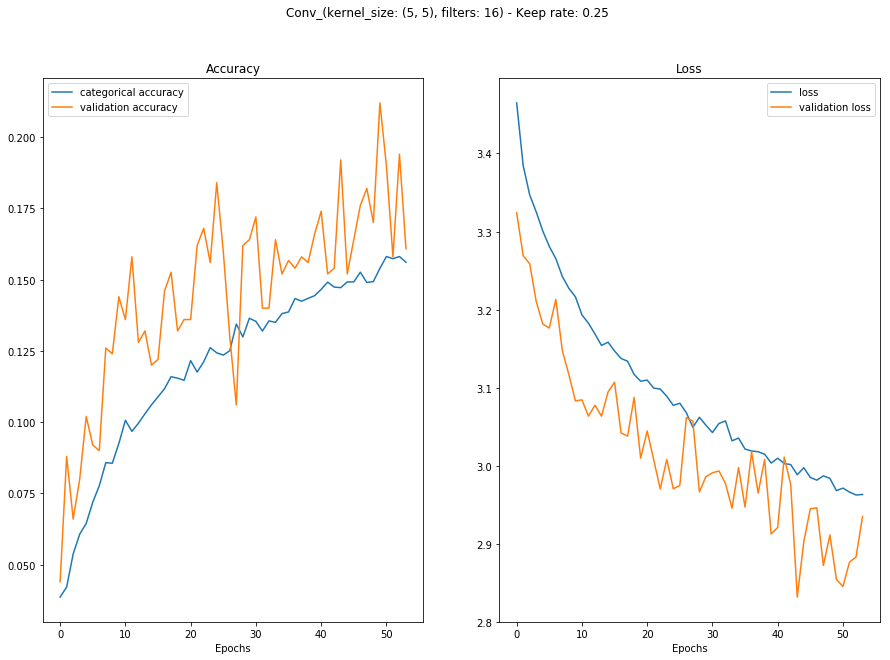

In [0]:
model.save("../gdrive/My Drive/Colab Notebooks/CNN-animal-and-human-class-augmented_learning-_cks{}_cfs{}_kr{}.h5".format(time.strftime("%Y-%m-%d"),conv_kernel_size, conv_filters, keep_rate))

plt.figure(figsize=(15,10))
plt.suptitle("Conv_(kernel_size: {}, filters: {}) - Keep rate: {}".format(conv_kernel_size, conv_filters, keep_rate))
plt.subplot(1,2,1)
plt.plot(hist.history["categorical_accuracy"], label="categorical accuracy")
plt.plot(hist.history["val_categorical_accuracy"], label="validation accuracy")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="validation loss")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.title("Loss")

Iters:  72
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 48, 48, 2)         20        
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 24, 24, 2)         0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 22, 22, 4)         76        
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 11, 11, 4)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 11, 11, 8)         296       
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 6, 6, 4)           292       

W0707 13:25:01.362127 140622631626624 nn_ops.py:4224] Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0707 13:25:01.412522 140622631626624 nn_ops.py:4224] Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 48, 48, 2)         20        
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 24, 24, 2)         0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 22, 22, 4)         76        
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 11, 11, 4)         0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 11, 11, 8)         296       
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 6, 6, 4)           292       
__________

W0707 13:34:16.608841 140622631626624 nn_ops.py:4224] Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0707 13:34:16.656951 140622631626624 nn_ops.py:4224] Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 48, 48, 4)         40        
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 24, 24, 4)         0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 22, 22, 8)         296       
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 11, 11, 8)         0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 6, 6, 8)           1160      
_________

W0707 13:40:59.069196 140622631626624 nn_ops.py:4224] Large dropout rate: 0.75 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 48, 48, 6)         60        
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 22, 22, 12)        660       
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 11, 11, 12)        0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 11, 11, 24)        2616      
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 6, 6, 24)          0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 6, 6, 12)          2604      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_191 (Conv2D)          (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_191 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_192 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_193 (MaxPoolin (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 6, 6, 64)          73792     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_196 (Conv2D)          (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_196 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_197 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_198 (MaxPoolin (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_199 (Conv2D)          (None, 6, 6, 64)          73792     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_201 (Conv2D)          (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_201 (MaxPoolin (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_202 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_203 (MaxPoolin (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 6, 6, 64)          73792     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_206 (Conv2D)          (None, 46, 46, 2)         52        
_________________________________________________________________
max_pooling2d_206 (MaxPoolin (None, 23, 23, 2)         0         
_________________________________________________________________
conv2d_207 (Conv2D)          (None, 19, 19, 4)         204       
_________________________________________________________________
max_pooling2d_207 (MaxPoolin (None, 9, 9, 4)           0         
_________________________________________________________________
conv2d_208 (Conv2D)          (None, 9, 9, 8)           808       
_________________________________________________________________
max_pooling2d_208 (MaxPoolin (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 5, 5, 4)           804       
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_211 (Conv2D)          (None, 46, 46, 2)         52        
_________________________________________________________________
max_pooling2d_211 (MaxPoolin (None, 23, 23, 2)         0         
_________________________________________________________________
conv2d_212 (Conv2D)          (None, 19, 19, 4)         204       
_________________________________________________________________
max_pooling2d_212 (MaxPoolin (None, 9, 9, 4)           0         
_________________________________________________________________
conv2d_213 (Conv2D)          (None, 9, 9, 8)           808       
_________________________________________________________________
max_pooling2d_213 (MaxPoolin (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_214 (Conv2D)          (None, 5, 5, 4)           804       
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 46, 46, 2)         52        
_________________________________________________________________
max_pooling2d_216 (MaxPoolin (None, 23, 23, 2)         0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 19, 19, 4)         204       
_________________________________________________________________
max_pooling2d_217 (MaxPoolin (None, 9, 9, 4)           0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 9, 9, 8)           808       
_________________________________________________________________
max_pooling2d_218 (MaxPoolin (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 5, 5, 4)           804       
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_221 (Conv2D)          (None, 46, 46, 2)         52        
_________________________________________________________________
max_pooling2d_221 (MaxPoolin (None, 23, 23, 2)         0         
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 19, 19, 4)         204       
_________________________________________________________________
max_pooling2d_222 (MaxPoolin (None, 9, 9, 4)           0         
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 9, 9, 8)           808       
_________________________________________________________________
max_pooling2d_223 (MaxPoolin (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 5, 5, 4)           804       
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_226 (Conv2D)          (None, 46, 46, 4)         104       
_________________________________________________________________
max_pooling2d_226 (MaxPoolin (None, 23, 23, 4)         0         
_________________________________________________________________
conv2d_227 (Conv2D)          (None, 19, 19, 8)         808       
_________________________________________________________________
max_pooling2d_227 (MaxPoolin (None, 9, 9, 8)           0         
_________________________________________________________________
conv2d_228 (Conv2D)          (None, 9, 9, 16)          3216      
_________________________________________________________________
max_pooling2d_228 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_229 (Conv2D)          (None, 5, 5, 8)           3208      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_231 (Conv2D)          (None, 46, 46, 4)         104       
_________________________________________________________________
max_pooling2d_231 (MaxPoolin (None, 23, 23, 4)         0         
_________________________________________________________________
conv2d_232 (Conv2D)          (None, 19, 19, 8)         808       
_________________________________________________________________
max_pooling2d_232 (MaxPoolin (None, 9, 9, 8)           0         
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 9, 9, 16)          3216      
_________________________________________________________________
max_pooling2d_233 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 5, 5, 8)           3208      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_236 (Conv2D)          (None, 46, 46, 4)         104       
_________________________________________________________________
max_pooling2d_236 (MaxPoolin (None, 23, 23, 4)         0         
_________________________________________________________________
conv2d_237 (Conv2D)          (None, 19, 19, 8)         808       
_________________________________________________________________
max_pooling2d_237 (MaxPoolin (None, 9, 9, 8)           0         
_________________________________________________________________
conv2d_238 (Conv2D)          (None, 9, 9, 16)          3216      
_________________________________________________________________
max_pooling2d_238 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_239 (Conv2D)          (None, 5, 5, 8)           3208      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_241 (Conv2D)          (None, 46, 46, 4)         104       
_________________________________________________________________
max_pooling2d_241 (MaxPoolin (None, 23, 23, 4)         0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 19, 19, 8)         808       
_________________________________________________________________
max_pooling2d_242 (MaxPoolin (None, 9, 9, 8)           0         
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 9, 9, 16)          3216      
_________________________________________________________________
max_pooling2d_243 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_244 (Conv2D)          (None, 5, 5, 8)           3208      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_246 (Conv2D)          (None, 46, 46, 6)         156       
_________________________________________________________________
max_pooling2d_246 (MaxPoolin (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 19, 19, 12)        1812      
_________________________________________________________________
max_pooling2d_247 (MaxPoolin (None, 9, 9, 12)          0         
_________________________________________________________________
conv2d_248 (Conv2D)          (None, 9, 9, 24)          7224      
_________________________________________________________________
max_pooling2d_248 (MaxPoolin (None, 5, 5, 24)          0         
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 5, 5, 12)          7212      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_251 (Conv2D)          (None, 46, 46, 6)         156       
_________________________________________________________________
max_pooling2d_251 (MaxPoolin (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_252 (Conv2D)          (None, 19, 19, 12)        1812      
_________________________________________________________________
max_pooling2d_252 (MaxPoolin (None, 9, 9, 12)          0         
_________________________________________________________________
conv2d_253 (Conv2D)          (None, 9, 9, 24)          7224      
_________________________________________________________________
max_pooling2d_253 (MaxPoolin (None, 5, 5, 24)          0         
_________________________________________________________________
conv2d_254 (Conv2D)          (None, 5, 5, 12)          7212      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_256 (Conv2D)          (None, 46, 46, 6)         156       
_________________________________________________________________
max_pooling2d_256 (MaxPoolin (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_257 (Conv2D)          (None, 19, 19, 12)        1812      
_________________________________________________________________
max_pooling2d_257 (MaxPoolin (None, 9, 9, 12)          0         
_________________________________________________________________
conv2d_258 (Conv2D)          (None, 9, 9, 24)          7224      
_________________________________________________________________
max_pooling2d_258 (MaxPoolin (None, 5, 5, 24)          0         
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 5, 5, 12)          7212      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_261 (Conv2D)          (None, 46, 46, 6)         156       
_________________________________________________________________
max_pooling2d_261 (MaxPoolin (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_262 (Conv2D)          (None, 19, 19, 12)        1812      
_________________________________________________________________
max_pooling2d_262 (MaxPoolin (None, 9, 9, 12)          0         
_________________________________________________________________
conv2d_263 (Conv2D)          (None, 9, 9, 24)          7224      
_________________________________________________________________
max_pooling2d_263 (MaxPoolin (None, 5, 5, 24)          0         
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 5, 5, 12)          7212      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_266 (Conv2D)          (None, 46, 46, 8)         208       
_________________________________________________________________
max_pooling2d_266 (MaxPoolin (None, 23, 23, 8)         0         
_________________________________________________________________
conv2d_267 (Conv2D)          (None, 19, 19, 16)        3216      
_________________________________________________________________
max_pooling2d_267 (MaxPoolin (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_268 (Conv2D)          (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_268 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_269 (Conv2D)          (None, 5, 5, 16)          12816     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_271 (Conv2D)          (None, 46, 46, 8)         208       
_________________________________________________________________
max_pooling2d_271 (MaxPoolin (None, 23, 23, 8)         0         
_________________________________________________________________
conv2d_272 (Conv2D)          (None, 19, 19, 16)        3216      
_________________________________________________________________
max_pooling2d_272 (MaxPoolin (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_273 (Conv2D)          (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_273 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_274 (Conv2D)          (None, 5, 5, 16)          12816     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_276 (Conv2D)          (None, 46, 46, 8)         208       
_________________________________________________________________
max_pooling2d_276 (MaxPoolin (None, 23, 23, 8)         0         
_________________________________________________________________
conv2d_277 (Conv2D)          (None, 19, 19, 16)        3216      
_________________________________________________________________
max_pooling2d_277 (MaxPoolin (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_278 (Conv2D)          (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_278 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_279 (Conv2D)          (None, 5, 5, 16)          12816     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_281 (Conv2D)          (None, 46, 46, 8)         208       
_________________________________________________________________
max_pooling2d_281 (MaxPoolin (None, 23, 23, 8)         0         
_________________________________________________________________
conv2d_282 (Conv2D)          (None, 19, 19, 16)        3216      
_________________________________________________________________
max_pooling2d_282 (MaxPoolin (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_283 (Conv2D)          (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_283 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_284 (Conv2D)          (None, 5, 5, 16)          12816     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_286 (Conv2D)          (None, 46, 46, 16)        416       
_________________________________________________________________
max_pooling2d_286 (MaxPoolin (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_287 (Conv2D)          (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_287 (MaxPoolin (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_288 (Conv2D)          (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_288 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_289 (Conv2D)          (None, 5, 5, 32)          51232     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_291 (Conv2D)          (None, 46, 46, 16)        416       
_________________________________________________________________
max_pooling2d_291 (MaxPoolin (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_292 (Conv2D)          (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_292 (MaxPoolin (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_293 (Conv2D)          (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_293 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_294 (Conv2D)          (None, 5, 5, 32)          51232     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_296 (Conv2D)          (None, 46, 46, 16)        416       
_________________________________________________________________
max_pooling2d_296 (MaxPoolin (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_297 (Conv2D)          (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_297 (MaxPoolin (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_298 (Conv2D)          (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_298 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_299 (Conv2D)          (None, 5, 5, 32)          51232     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_301 (Conv2D)          (None, 46, 46, 16)        416       
_________________________________________________________________
max_pooling2d_301 (MaxPoolin (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_302 (MaxPoolin (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_303 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 5, 5, 32)          51232     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_306 (Conv2D)          (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_306 (MaxPoolin (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_307 (MaxPoolin (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_308 (Conv2D)          (None, 9, 9, 128)         204928    
_________________________________________________________________
max_pooling2d_308 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_309 (Conv2D)          (None, 5, 5, 64)          204864    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_311 (Conv2D)          (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_311 (MaxPoolin (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_312 (Conv2D)          (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_312 (MaxPoolin (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_313 (Conv2D)          (None, 9, 9, 128)         204928    
_________________________________________________________________
max_pooling2d_313 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_314 (Conv2D)          (None, 5, 5, 64)          204864    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_316 (Conv2D)          (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_316 (MaxPoolin (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_317 (Conv2D)          (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_317 (MaxPoolin (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_318 (Conv2D)          (None, 9, 9, 128)         204928    
_________________________________________________________________
max_pooling2d_318 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_319 (Conv2D)          (None, 5, 5, 64)          204864    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_321 (Conv2D)          (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_321 (MaxPoolin (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_322 (Conv2D)          (None, 19, 19, 64)        51264     
_________________________________________________________________
max_pooling2d_322 (MaxPoolin (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_323 (Conv2D)          (None, 9, 9, 128)         204928    
_________________________________________________________________
max_pooling2d_323 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_324 (Conv2D)          (None, 5, 5, 64)          204864    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_326 (Conv2D)          (None, 44, 44, 2)         100       
_________________________________________________________________
max_pooling2d_326 (MaxPoolin (None, 22, 22, 2)         0         
_________________________________________________________________
conv2d_327 (Conv2D)          (None, 16, 16, 4)         396       
_________________________________________________________________
max_pooling2d_327 (MaxPoolin (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_328 (Conv2D)          (None, 8, 8, 8)           1576      
_________________________________________________________________
max_pooling2d_328 (MaxPoolin (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_329 (Conv2D)          (None, 4, 4, 4)           1572      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_331 (Conv2D)          (None, 44, 44, 2)         100       
_________________________________________________________________
max_pooling2d_331 (MaxPoolin (None, 22, 22, 2)         0         
_________________________________________________________________
conv2d_332 (Conv2D)          (None, 16, 16, 4)         396       
_________________________________________________________________
max_pooling2d_332 (MaxPoolin (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_333 (Conv2D)          (None, 8, 8, 8)           1576      
_________________________________________________________________
max_pooling2d_333 (MaxPoolin (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_334 (Conv2D)          (None, 4, 4, 4)           1572      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_336 (Conv2D)          (None, 44, 44, 2)         100       
_________________________________________________________________
max_pooling2d_336 (MaxPoolin (None, 22, 22, 2)         0         
_________________________________________________________________
conv2d_337 (Conv2D)          (None, 16, 16, 4)         396       
_________________________________________________________________
max_pooling2d_337 (MaxPoolin (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_338 (Conv2D)          (None, 8, 8, 8)           1576      
_________________________________________________________________
max_pooling2d_338 (MaxPoolin (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_339 (Conv2D)          (None, 4, 4, 4)           1572      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_341 (Conv2D)          (None, 44, 44, 2)         100       
_________________________________________________________________
max_pooling2d_341 (MaxPoolin (None, 22, 22, 2)         0         
_________________________________________________________________
conv2d_342 (Conv2D)          (None, 16, 16, 4)         396       
_________________________________________________________________
max_pooling2d_342 (MaxPoolin (None, 8, 8, 4)           0         
_________________________________________________________________
conv2d_343 (Conv2D)          (None, 8, 8, 8)           1576      
_________________________________________________________________
max_pooling2d_343 (MaxPoolin (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_344 (Conv2D)          (None, 4, 4, 4)           1572      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_346 (Conv2D)          (None, 44, 44, 4)         200       
_________________________________________________________________
max_pooling2d_346 (MaxPoolin (None, 22, 22, 4)         0         
_________________________________________________________________
conv2d_347 (Conv2D)          (None, 16, 16, 8)         1576      
_________________________________________________________________
max_pooling2d_347 (MaxPoolin (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_348 (Conv2D)          (None, 8, 8, 16)          6288      
_________________________________________________________________
max_pooling2d_348 (MaxPoolin (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_349 (Conv2D)          (None, 4, 4, 8)           6280      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_351 (Conv2D)          (None, 44, 44, 4)         200       
_________________________________________________________________
max_pooling2d_351 (MaxPoolin (None, 22, 22, 4)         0         
_________________________________________________________________
conv2d_352 (Conv2D)          (None, 16, 16, 8)         1576      
_________________________________________________________________
max_pooling2d_352 (MaxPoolin (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_353 (Conv2D)          (None, 8, 8, 16)          6288      
_________________________________________________________________
max_pooling2d_353 (MaxPoolin (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_354 (Conv2D)          (None, 4, 4, 8)           6280      
_________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_356 (Conv2D)          (None, 44, 44, 4)         200       
_________________________________________________________________
max_pooling2d_356 (MaxPoolin (None, 22, 22, 4)         0         
_________________________________________________________________
conv2d_357 (Conv2D)          (None, 16, 16, 8)         1576      
_________________________________________________________________
max_pooling2d_357 (MaxPoolin (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_358 (Conv2D)          (None, 8, 8, 16)          6288      
_________________________________________________________________
max_pooling2d_358 (MaxPoolin (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_359 (Conv2D)          (None, 4, 4, 8)           6280      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_361 (Conv2D)          (None, 44, 44, 4)         200       
_________________________________________________________________
max_pooling2d_361 (MaxPoolin (None, 22, 22, 4)         0         
_________________________________________________________________
conv2d_362 (Conv2D)          (None, 16, 16, 8)         1576      
_________________________________________________________________
max_pooling2d_362 (MaxPoolin (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_363 (Conv2D)          (None, 8, 8, 16)          6288      
_________________________________________________________________
max_pooling2d_363 (MaxPoolin (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_364 (Conv2D)          (None, 4, 4, 8)           6280      
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_366 (Conv2D)          (None, 44, 44, 6)         300       
_________________________________________________________________
max_pooling2d_366 (MaxPoolin (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_367 (Conv2D)          (None, 16, 16, 12)        3540      
_________________________________________________________________
max_pooling2d_367 (MaxPoolin (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_368 (Conv2D)          (None, 8, 8, 24)          14136     
_________________________________________________________________
max_pooling2d_368 (MaxPoolin (None, 4, 4, 24)          0         
_________________________________________________________________
conv2d_369 (Conv2D)          (None, 4, 4, 12)          14124     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_371 (Conv2D)          (None, 44, 44, 6)         300       
_________________________________________________________________
max_pooling2d_371 (MaxPoolin (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_372 (Conv2D)          (None, 16, 16, 12)        3540      
_________________________________________________________________
max_pooling2d_372 (MaxPoolin (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_373 (Conv2D)          (None, 8, 8, 24)          14136     
_________________________________________________________________
max_pooling2d_373 (MaxPoolin (None, 4, 4, 24)          0         
_________________________________________________________________
conv2d_374 (Conv2D)          (None, 4, 4, 12)          14124     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_376 (Conv2D)          (None, 44, 44, 6)         300       
_________________________________________________________________
max_pooling2d_376 (MaxPoolin (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_377 (Conv2D)          (None, 16, 16, 12)        3540      
_________________________________________________________________
max_pooling2d_377 (MaxPoolin (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_378 (Conv2D)          (None, 8, 8, 24)          14136     
_________________________________________________________________
max_pooling2d_378 (MaxPoolin (None, 4, 4, 24)          0         
_________________________________________________________________
conv2d_379 (Conv2D)          (None, 4, 4, 12)          14124     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_381 (Conv2D)          (None, 44, 44, 6)         300       
_________________________________________________________________
max_pooling2d_381 (MaxPoolin (None, 22, 22, 6)         0         
_________________________________________________________________
conv2d_382 (Conv2D)          (None, 16, 16, 12)        3540      
_________________________________________________________________
max_pooling2d_382 (MaxPoolin (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_383 (Conv2D)          (None, 8, 8, 24)          14136     
_________________________________________________________________
max_pooling2d_383 (MaxPoolin (None, 4, 4, 24)          0         
_________________________________________________________________
conv2d_384 (Conv2D)          (None, 4, 4, 12)          14124     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_386 (Conv2D)          (None, 44, 44, 8)         400       
_________________________________________________________________
max_pooling2d_386 (MaxPoolin (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_387 (Conv2D)          (None, 16, 16, 16)        6288      
_________________________________________________________________
max_pooling2d_387 (MaxPoolin (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_388 (Conv2D)          (None, 8, 8, 32)          25120     
_________________________________________________________________
max_pooling2d_388 (MaxPoolin (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_389 (Conv2D)          (None, 4, 4, 16)          25104     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_391 (Conv2D)          (None, 44, 44, 8)         400       
_________________________________________________________________
max_pooling2d_391 (MaxPoolin (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_392 (Conv2D)          (None, 16, 16, 16)        6288      
_________________________________________________________________
max_pooling2d_392 (MaxPoolin (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_393 (Conv2D)          (None, 8, 8, 32)          25120     
_________________________________________________________________
max_pooling2d_393 (MaxPoolin (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_394 (Conv2D)          (None, 4, 4, 16)          25104     
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_396 (Conv2D)          (None, 44, 44, 8)         400       
_________________________________________________________________
max_pooling2d_396 (MaxPoolin (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_397 (Conv2D)          (None, 16, 16, 16)        6288      
_________________________________________________________________
max_pooling2d_397 (MaxPoolin (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_398 (Conv2D)          (None, 8, 8, 32)          25120     
_________________________________________________________________
max_pooling2d_398 (MaxPoolin (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_399 (Conv2D)          (None, 4, 4, 16)          25104     
_________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_401 (Conv2D)          (None, 44, 44, 8)         400       
_________________________________________________________________
max_pooling2d_401 (MaxPoolin (None, 22, 22, 8)         0         
_________________________________________________________________
conv2d_402 (Conv2D)          (None, 16, 16, 16)        6288      
_________________________________________________________________
max_pooling2d_402 (MaxPoolin (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_403 (Conv2D)          (None, 8, 8, 32)          25120     
_________________________________________________________________
max_pooling2d_403 (MaxPoolin (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_404 (Conv2D)          (None, 4, 4, 16)          25104     
_________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_406 (Conv2D)          (None, 44, 44, 16)        800       
_________________________________________________________________
max_pooling2d_406 (MaxPoolin (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_407 (Conv2D)          (None, 16, 16, 32)        25120     
_________________________________________________________________
max_pooling2d_407 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_408 (Conv2D)          (None, 8, 8, 64)          100416    
_________________________________________________________________
max_pooling2d_408 (MaxPoolin (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_409 (Conv2D)          (None, 4, 4, 32)          100384    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_411 (Conv2D)          (None, 44, 44, 16)        800       
_________________________________________________________________
max_pooling2d_411 (MaxPoolin (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_412 (Conv2D)          (None, 16, 16, 32)        25120     
_________________________________________________________________
max_pooling2d_412 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_413 (Conv2D)          (None, 8, 8, 64)          100416    
_________________________________________________________________
max_pooling2d_413 (MaxPoolin (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_414 (Conv2D)          (None, 4, 4, 32)          100384    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_416 (Conv2D)          (None, 44, 44, 16)        800       
_________________________________________________________________
max_pooling2d_416 (MaxPoolin (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_417 (Conv2D)          (None, 16, 16, 32)        25120     
_________________________________________________________________
max_pooling2d_417 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_418 (Conv2D)          (None, 8, 8, 64)          100416    
_________________________________________________________________
max_pooling2d_418 (MaxPoolin (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_419 (Conv2D)          (None, 4, 4, 32)          100384    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_421 (Conv2D)          (None, 44, 44, 16)        800       
_________________________________________________________________
max_pooling2d_421 (MaxPoolin (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_422 (Conv2D)          (None, 16, 16, 32)        25120     
_________________________________________________________________
max_pooling2d_422 (MaxPoolin (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_423 (Conv2D)          (None, 8, 8, 64)          100416    
_________________________________________________________________
max_pooling2d_423 (MaxPoolin (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_424 (Conv2D)          (None, 4, 4, 32)          100384    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_426 (Conv2D)          (None, 44, 44, 32)        1600      
_________________________________________________________________
max_pooling2d_426 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_427 (Conv2D)          (None, 16, 16, 64)        100416    
_________________________________________________________________
max_pooling2d_427 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_428 (Conv2D)          (None, 8, 8, 128)         401536    
_________________________________________________________________
max_pooling2d_428 (MaxPoolin (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_429 (Conv2D)          (None, 4, 4, 64)          401472    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_431 (Conv2D)          (None, 44, 44, 32)        1600      
_________________________________________________________________
max_pooling2d_431 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_432 (Conv2D)          (None, 16, 16, 64)        100416    
_________________________________________________________________
max_pooling2d_432 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_433 (Conv2D)          (None, 8, 8, 128)         401536    
_________________________________________________________________
max_pooling2d_433 (MaxPoolin (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_434 (Conv2D)          (None, 4, 4, 64)          401472    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_436 (Conv2D)          (None, 44, 44, 32)        1600      
_________________________________________________________________
max_pooling2d_436 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_437 (Conv2D)          (None, 16, 16, 64)        100416    
_________________________________________________________________
max_pooling2d_437 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_438 (Conv2D)          (None, 8, 8, 128)         401536    
_________________________________________________________________
max_pooling2d_438 (MaxPoolin (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_439 (Conv2D)          (None, 4, 4, 64)          401472    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_441 (Conv2D)          (None, 44, 44, 32)        1600      
_________________________________________________________________
max_pooling2d_441 (MaxPoolin (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_442 (Conv2D)          (None, 16, 16, 64)        100416    
_________________________________________________________________
max_pooling2d_442 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_443 (Conv2D)          (None, 8, 8, 128)         401536    
_________________________________________________________________
max_pooling2d_443 (MaxPoolin (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_444 (Conv2D)          (None, 4, 4, 64)          401472    
__________

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Finished!


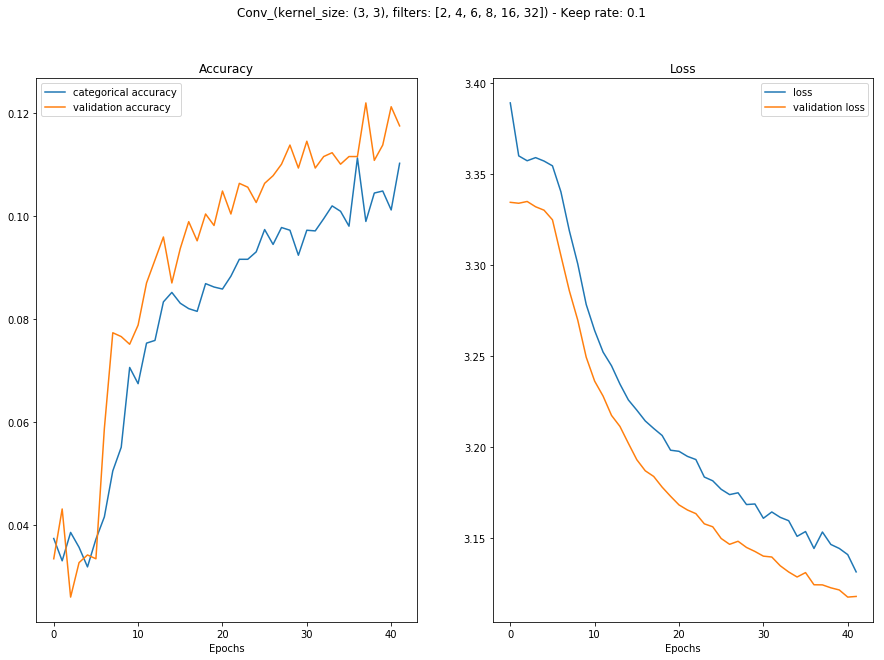

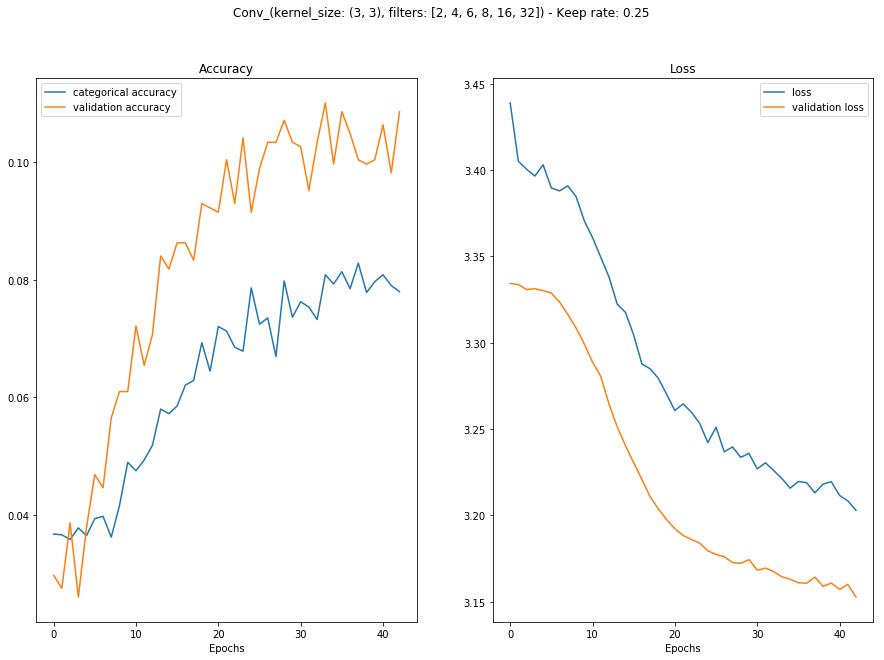

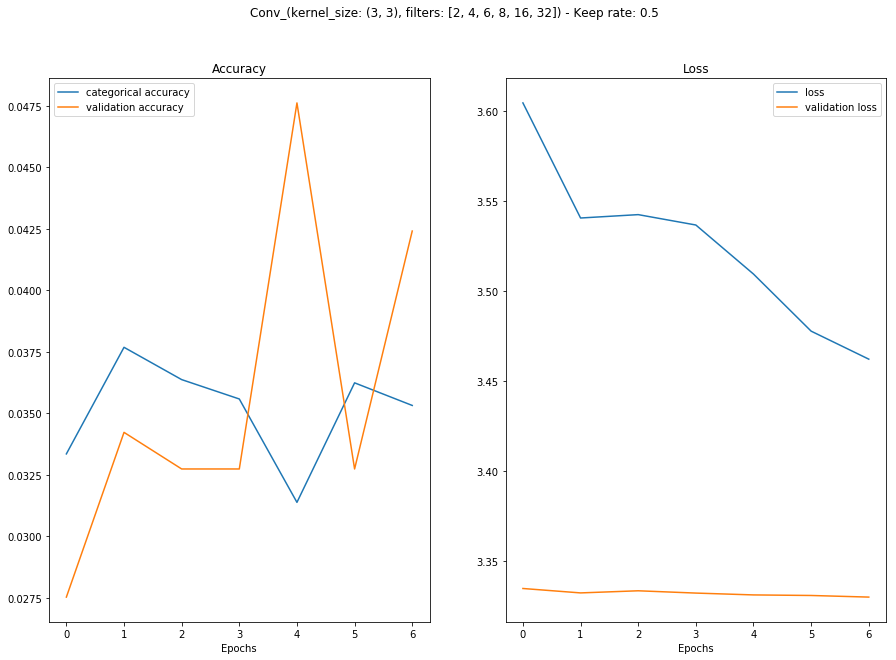

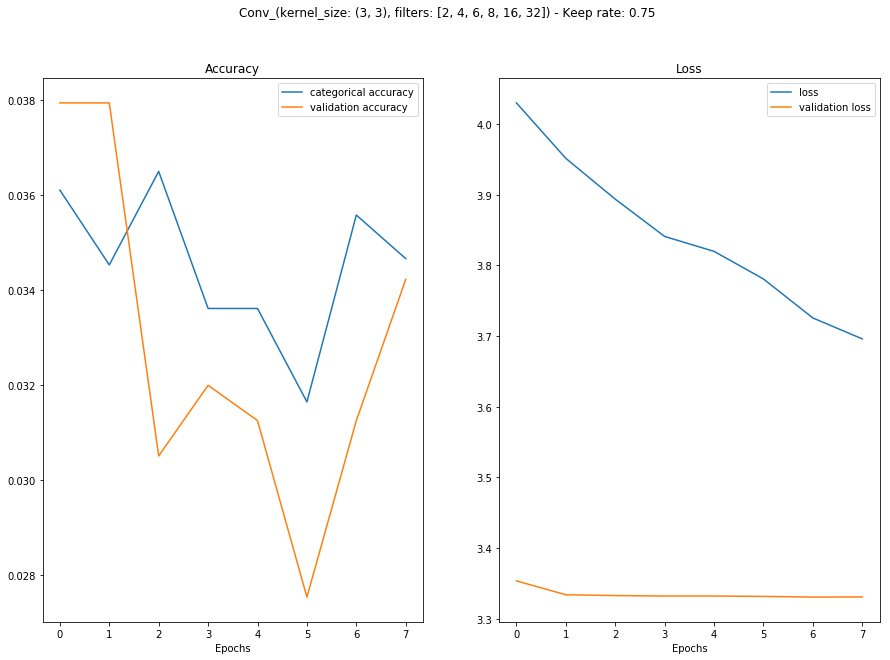

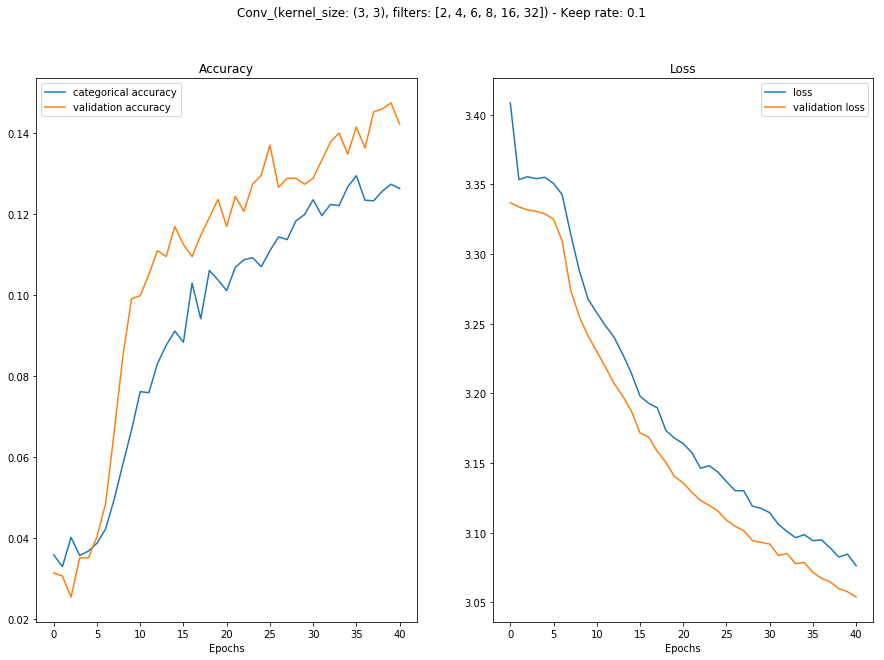

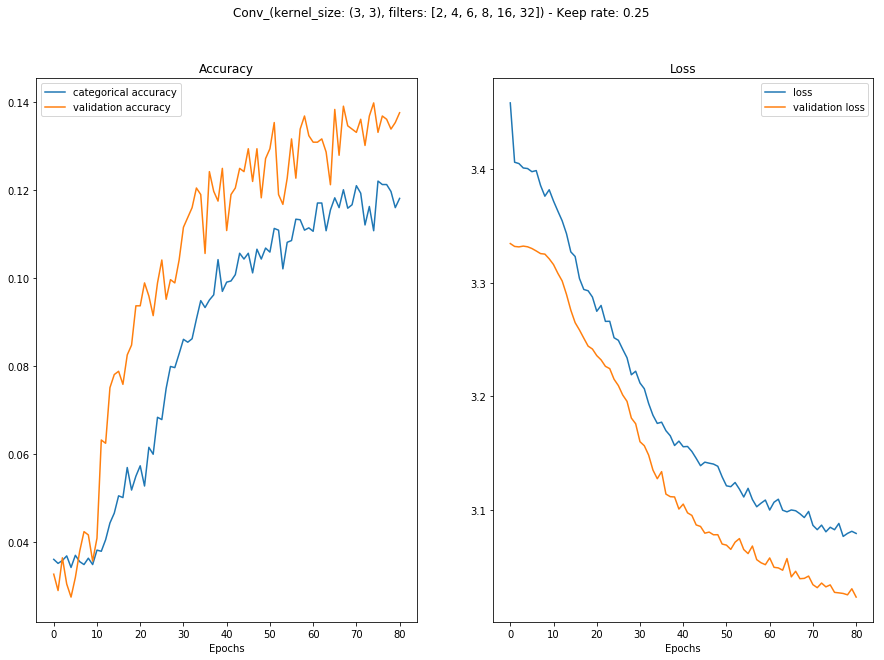

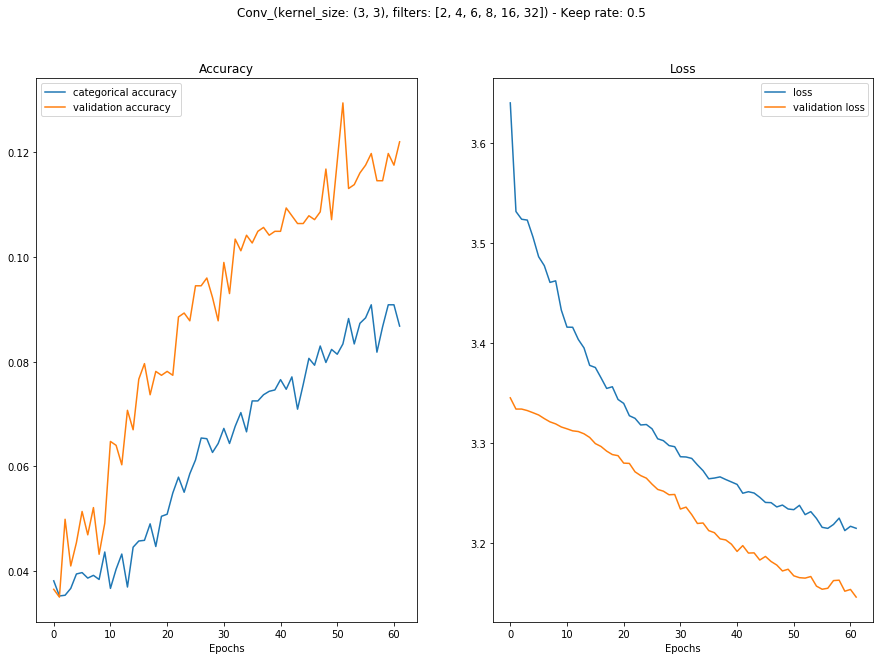

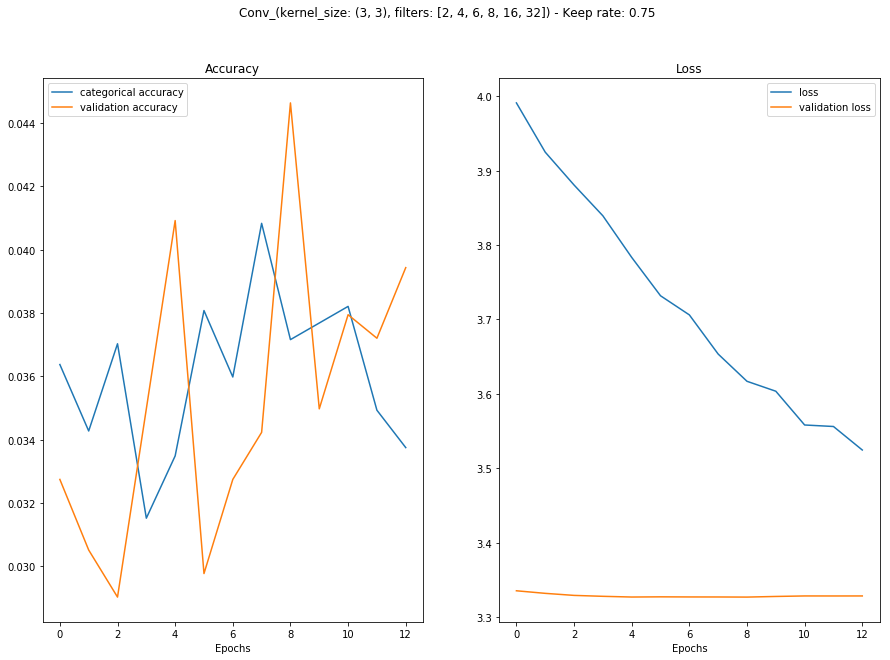

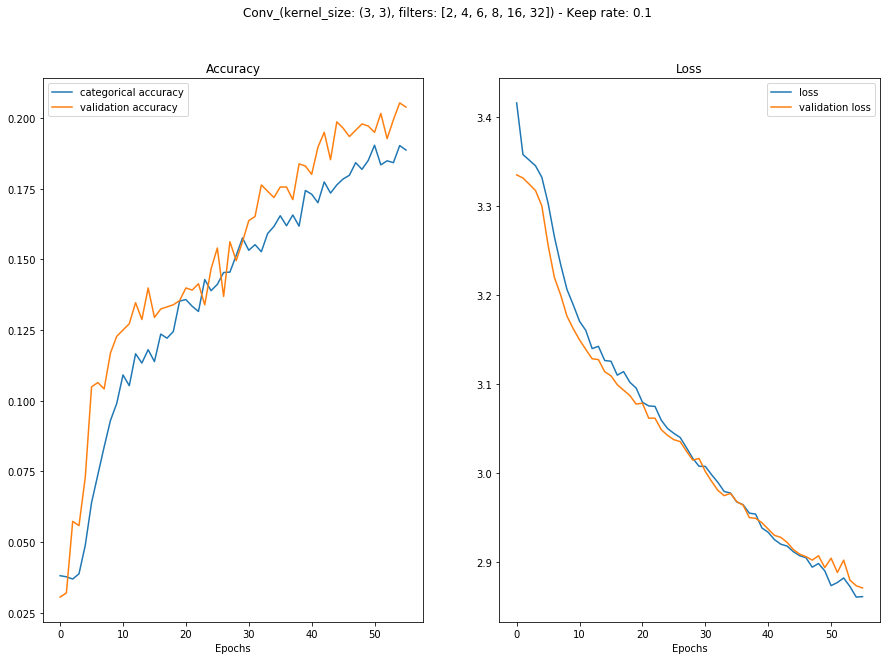

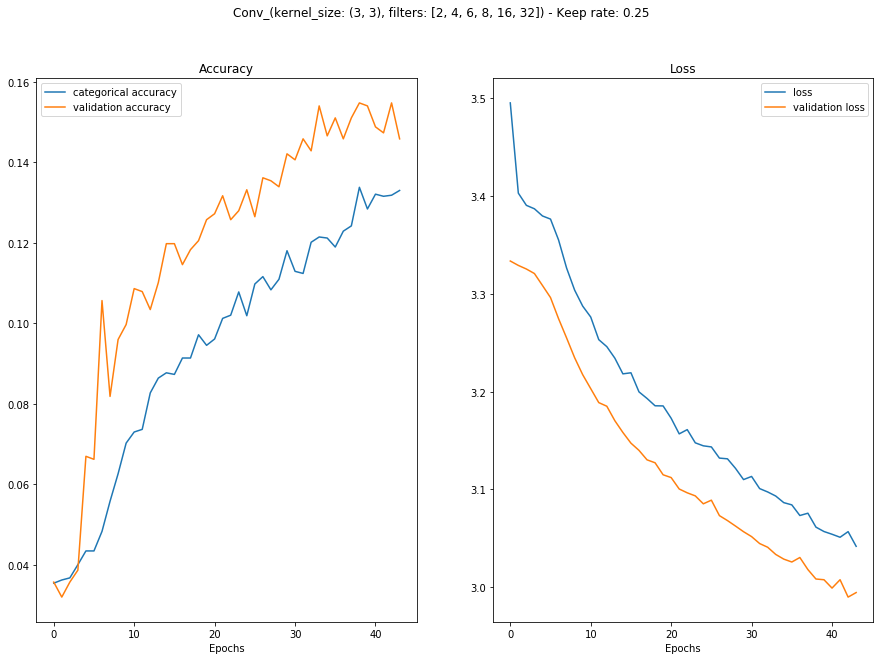

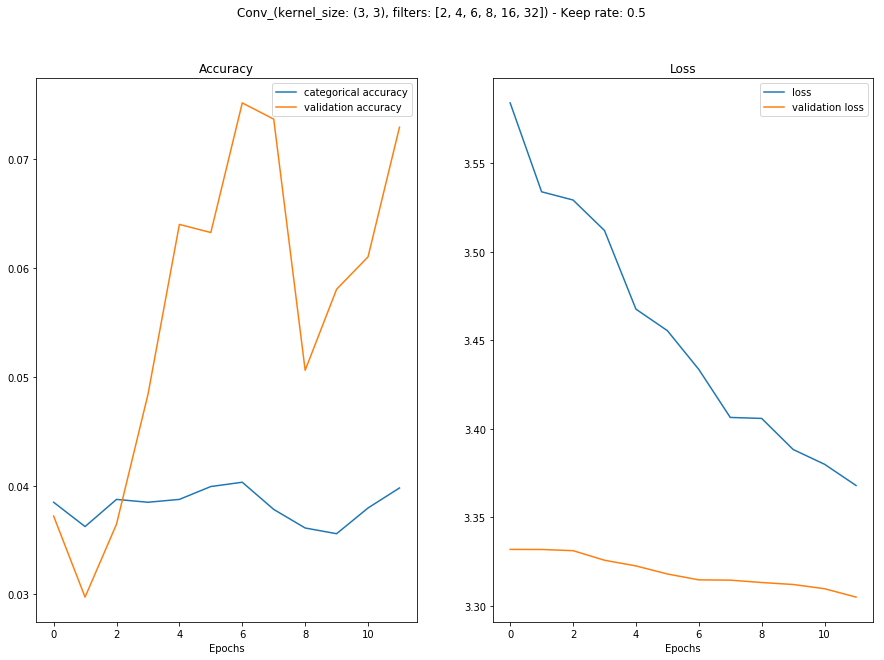

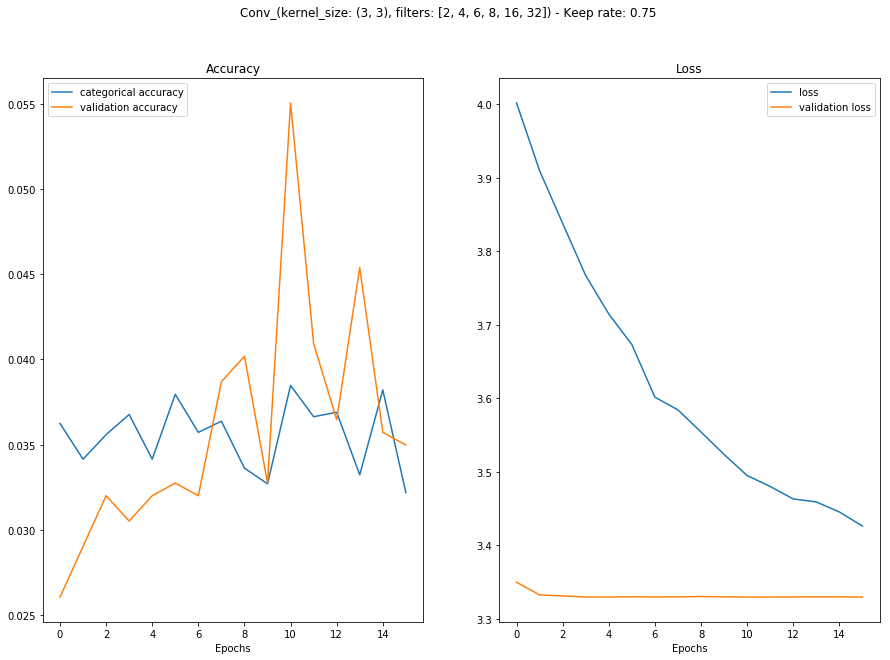

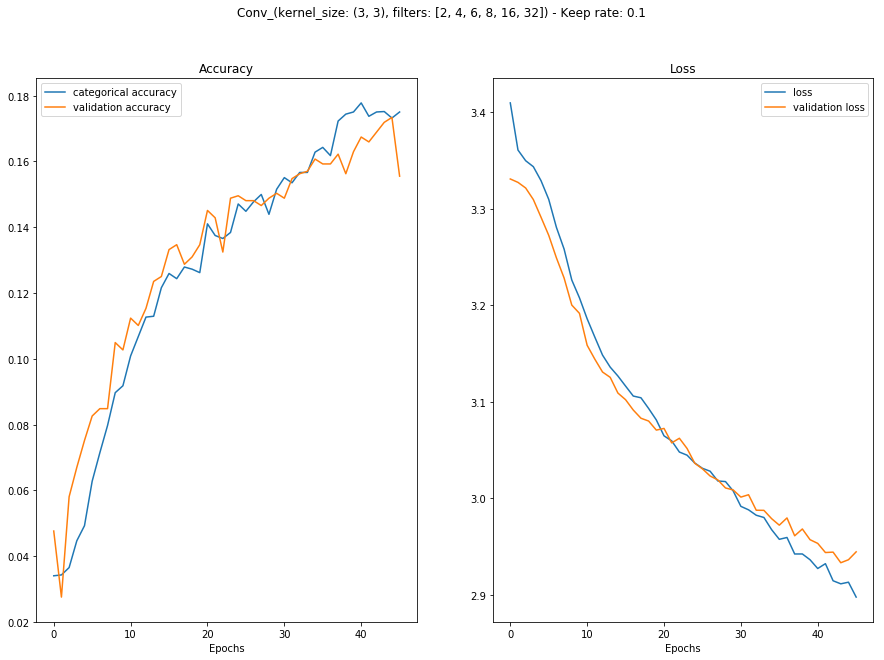

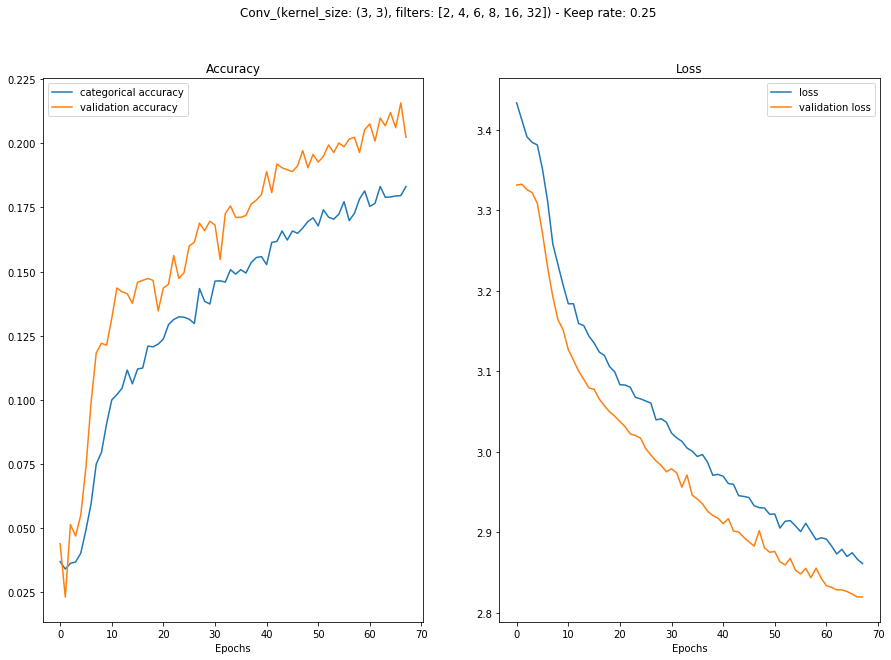

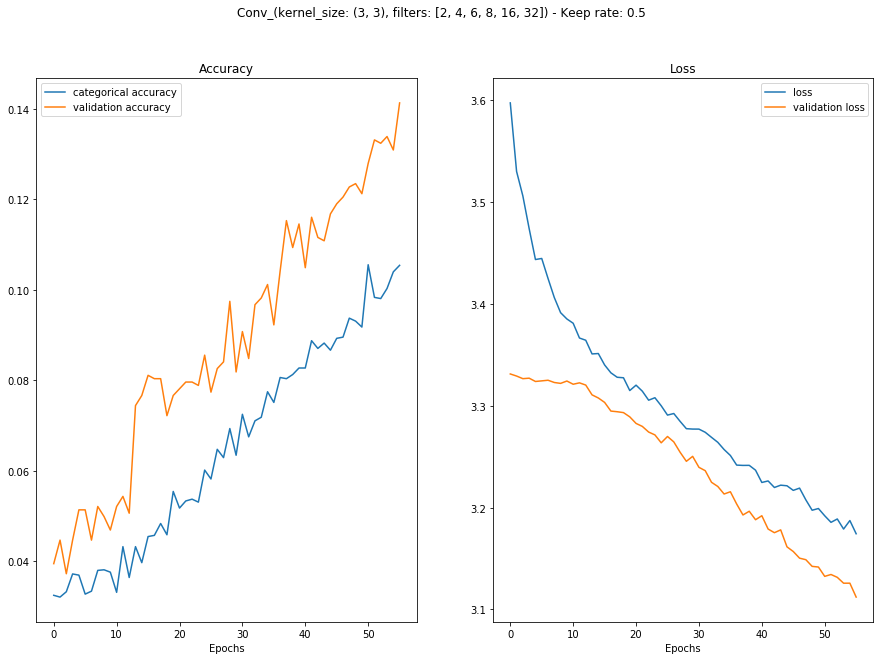

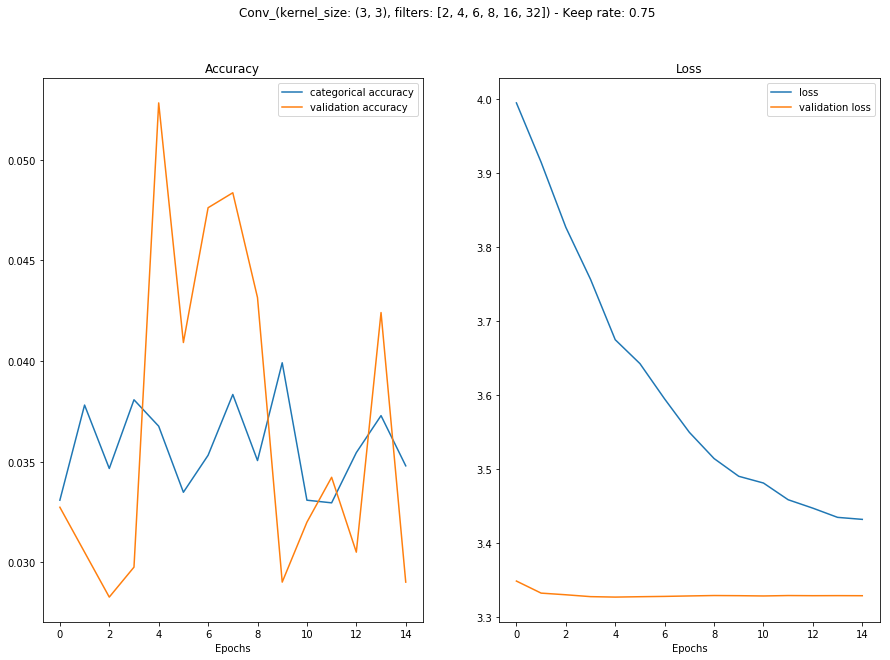

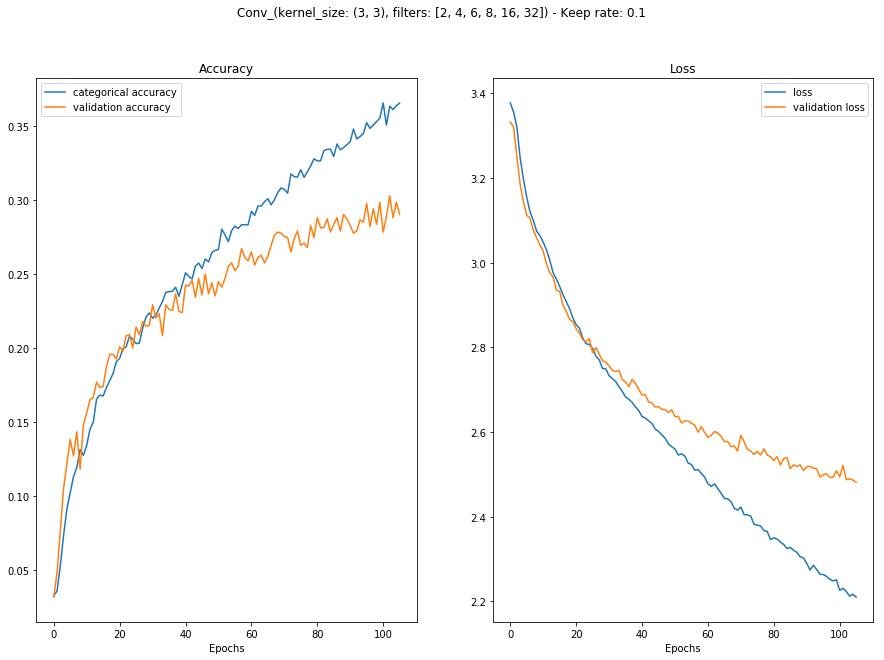

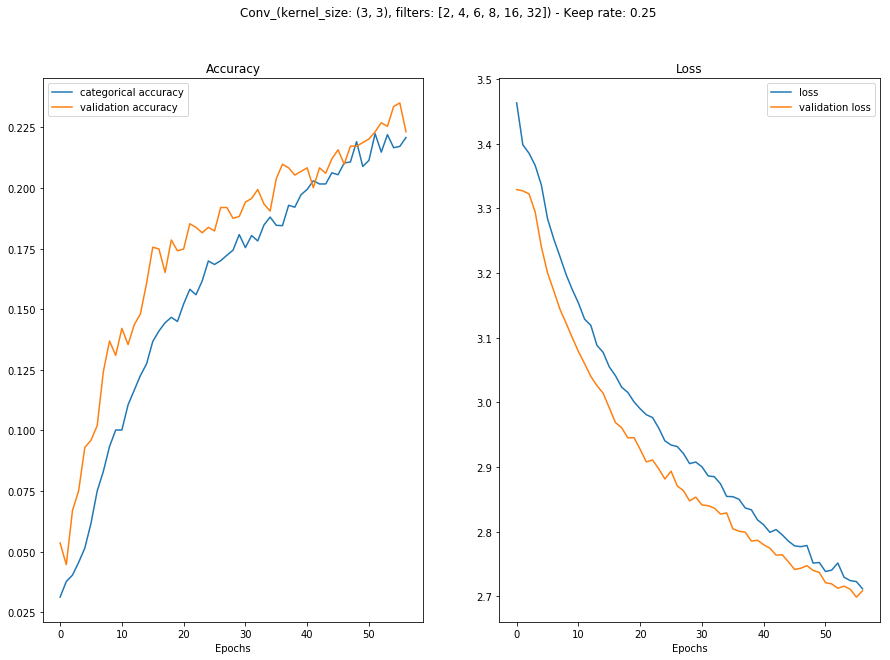

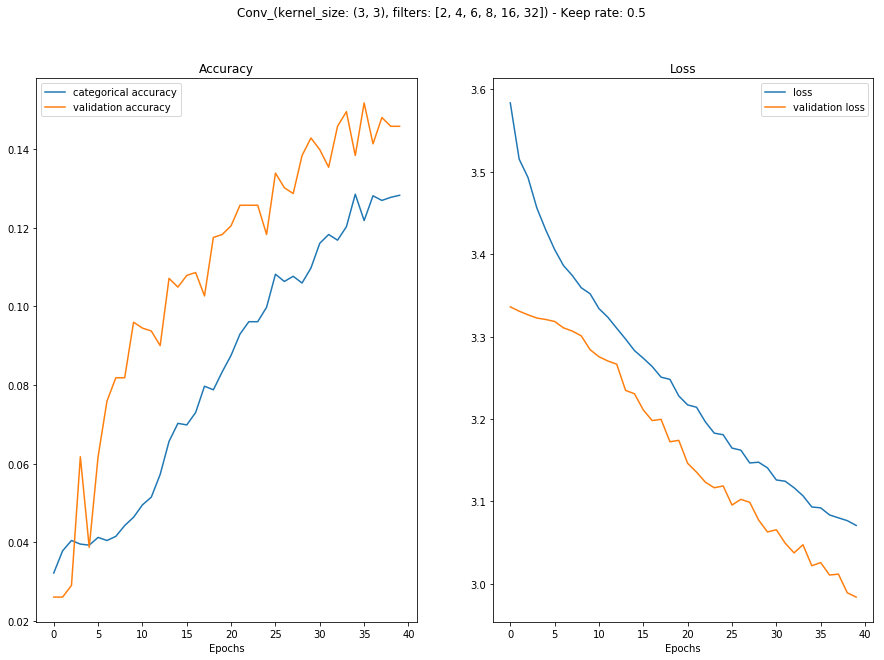

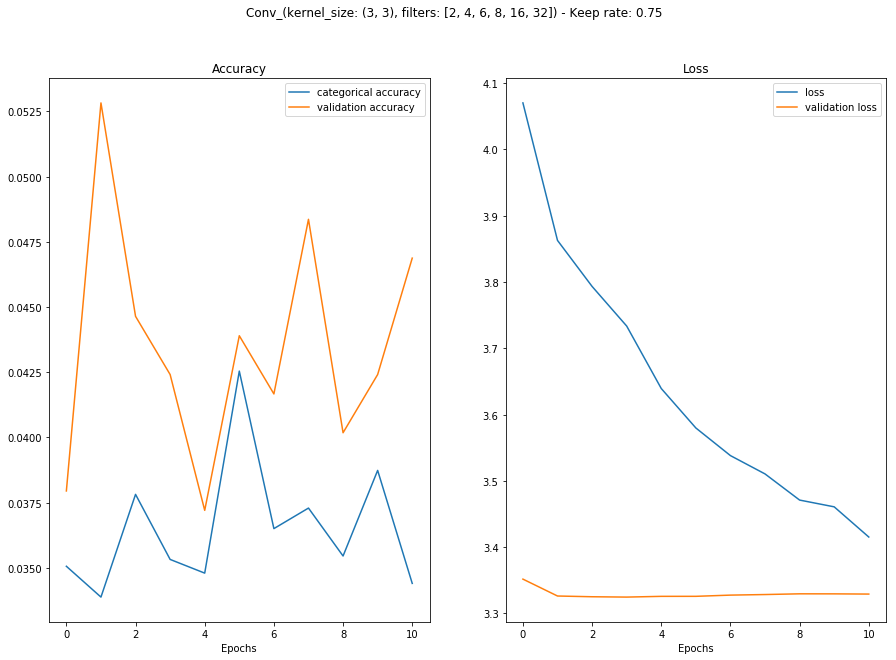

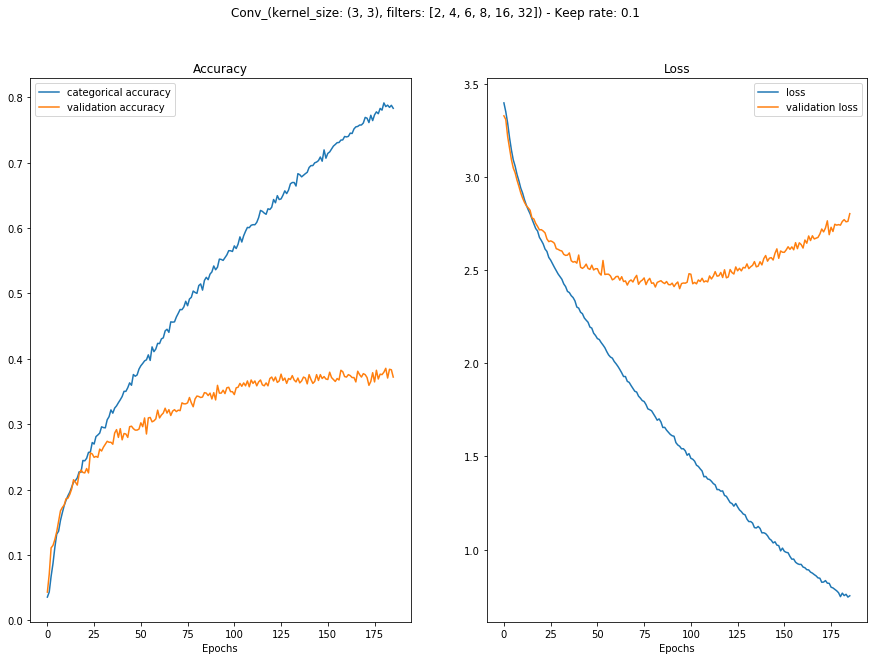

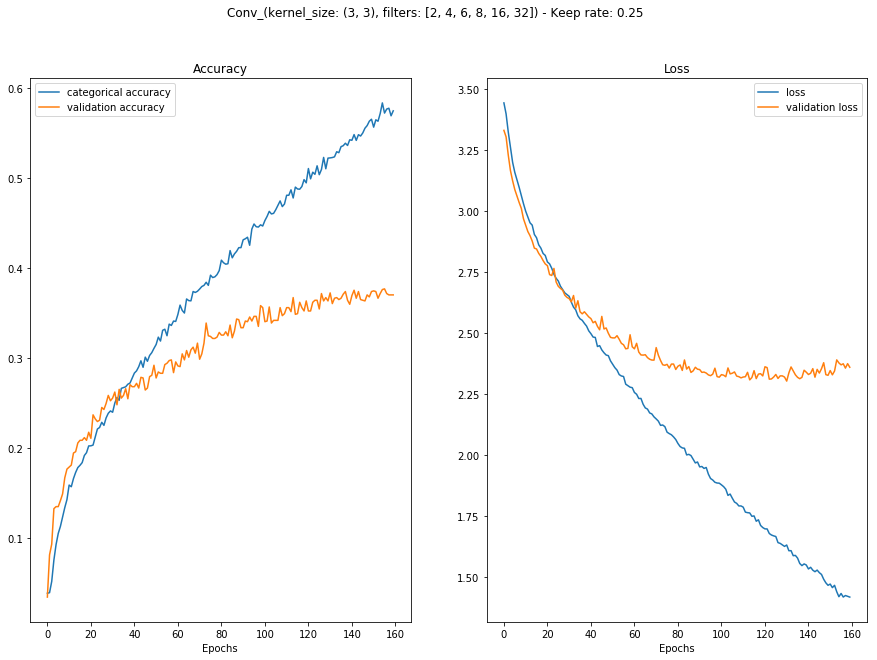

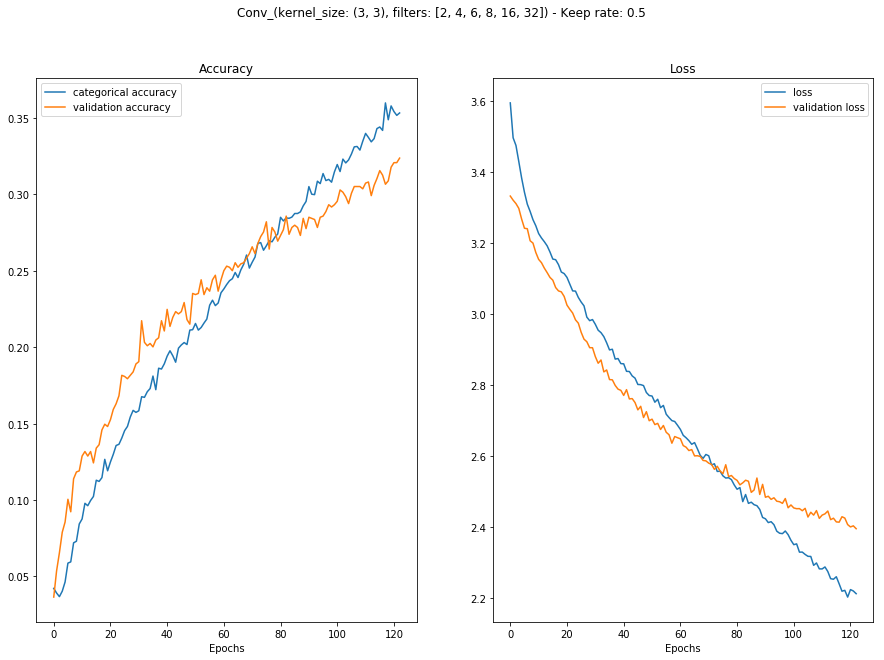

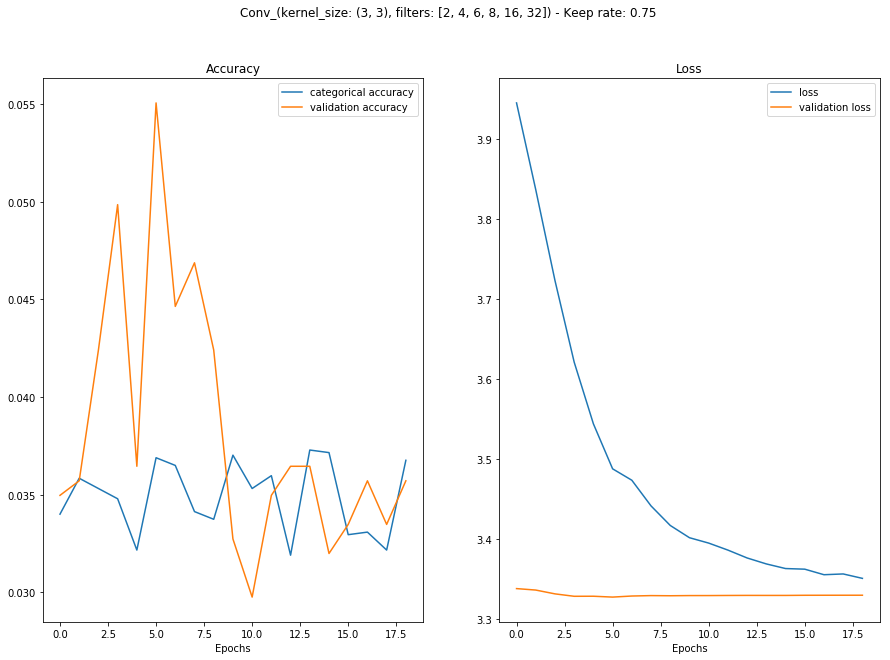

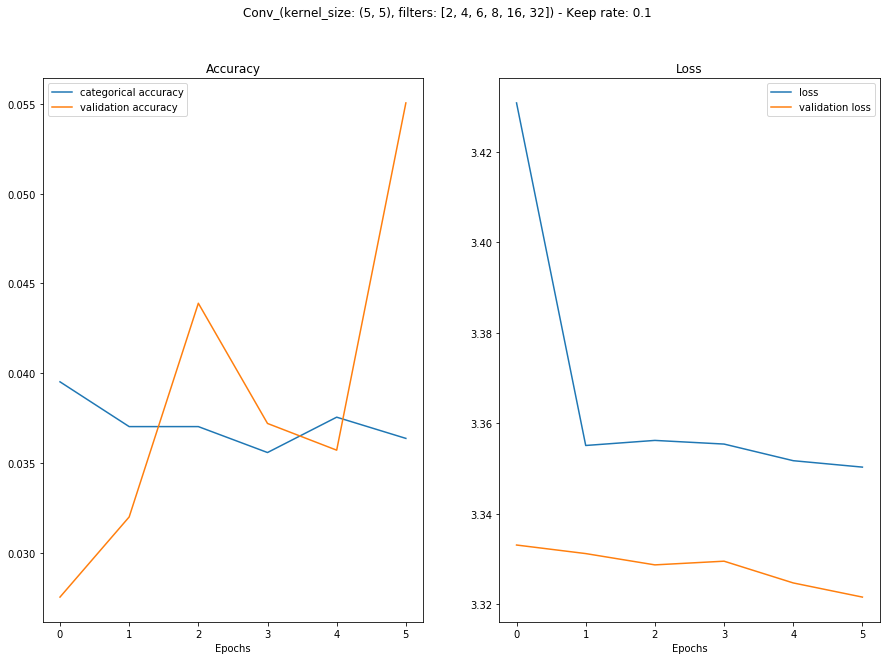

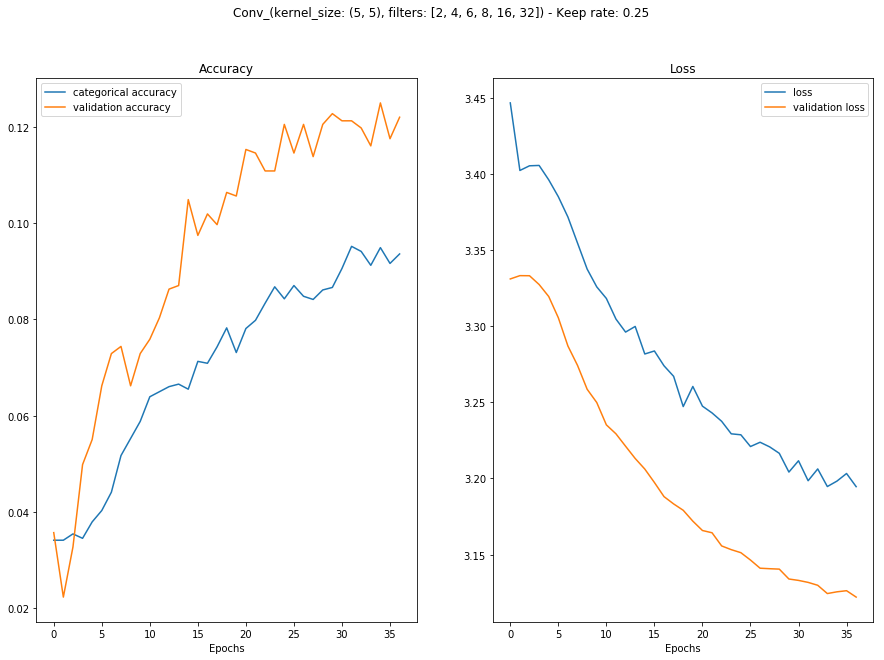

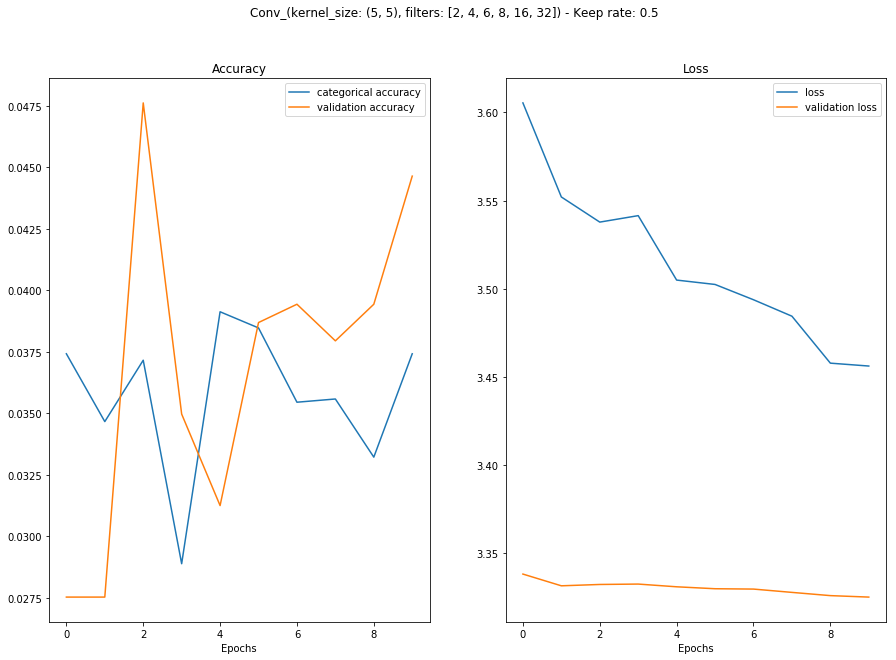

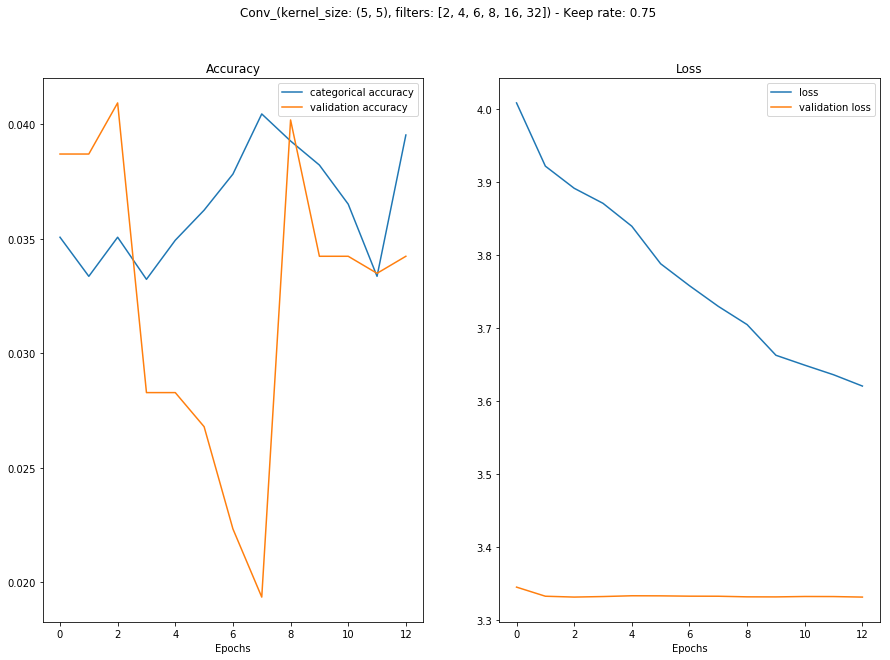

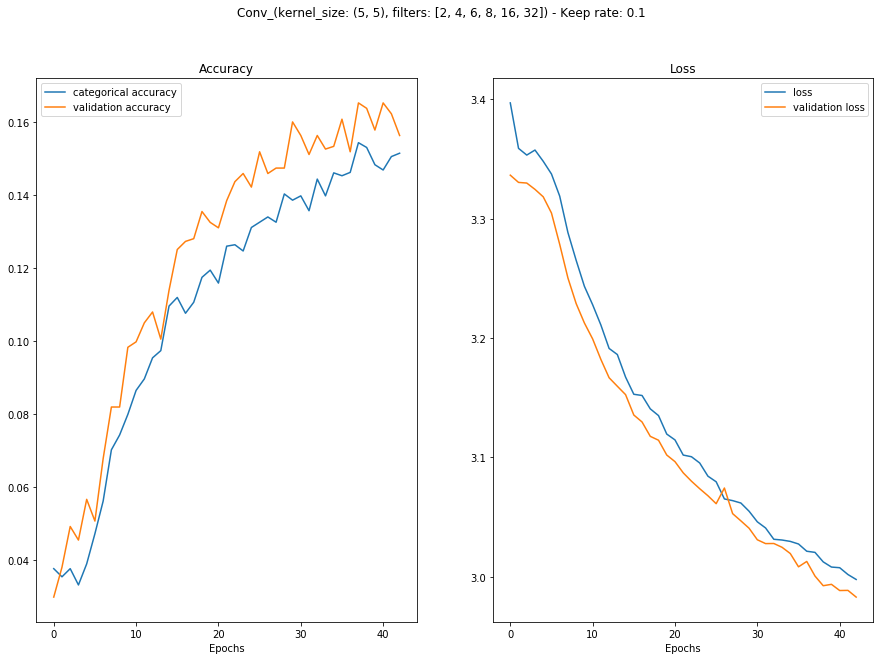

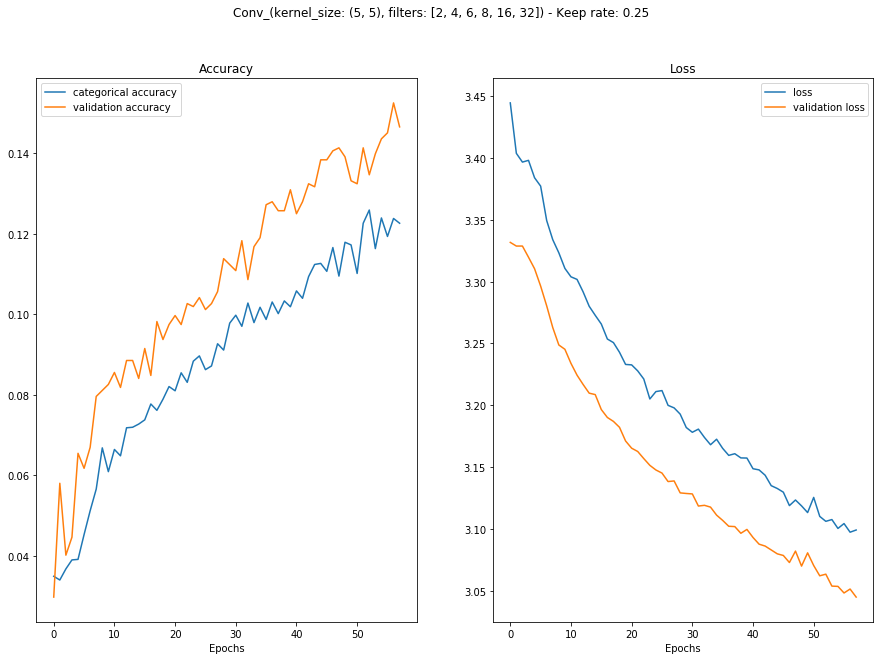

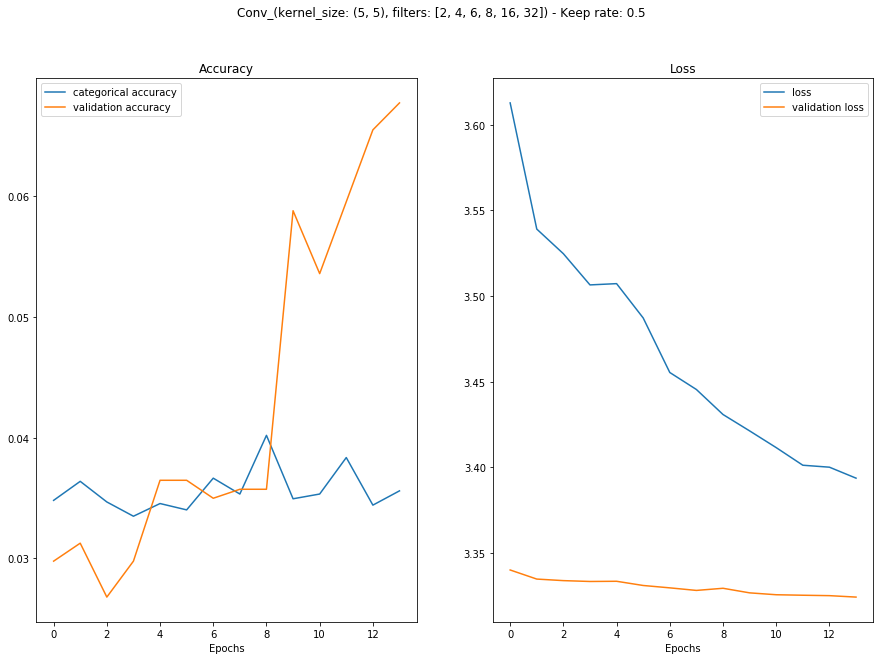

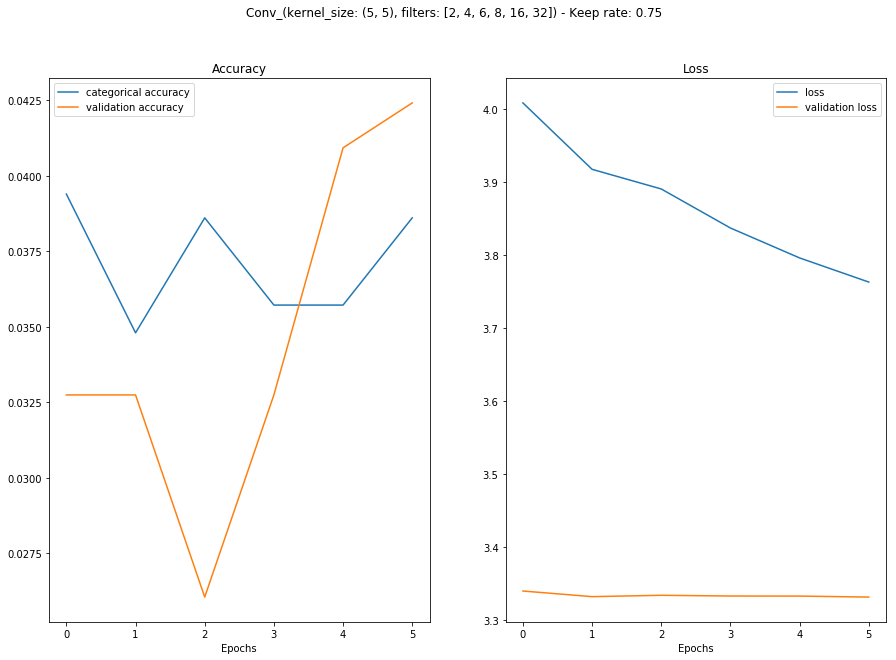

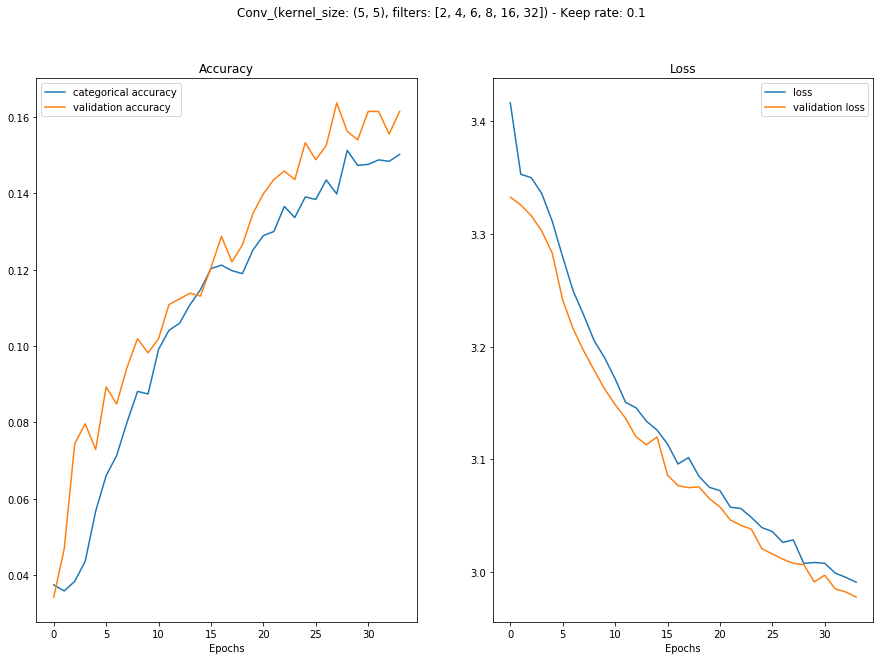

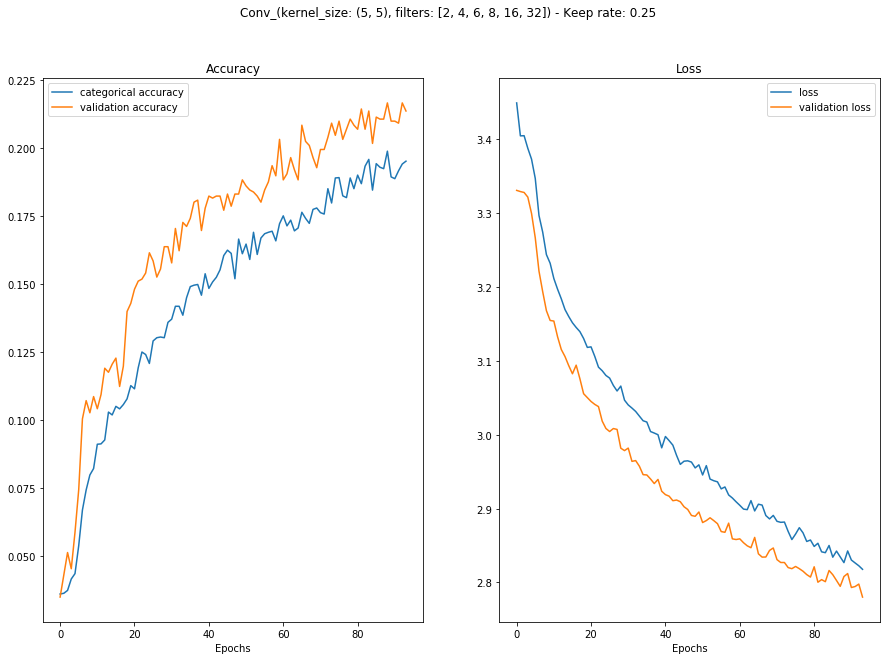

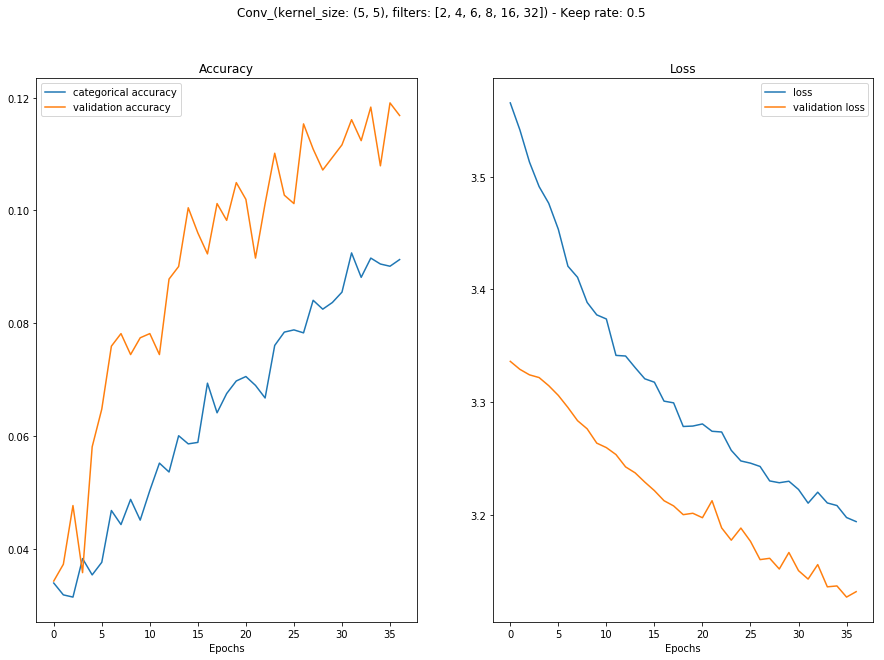

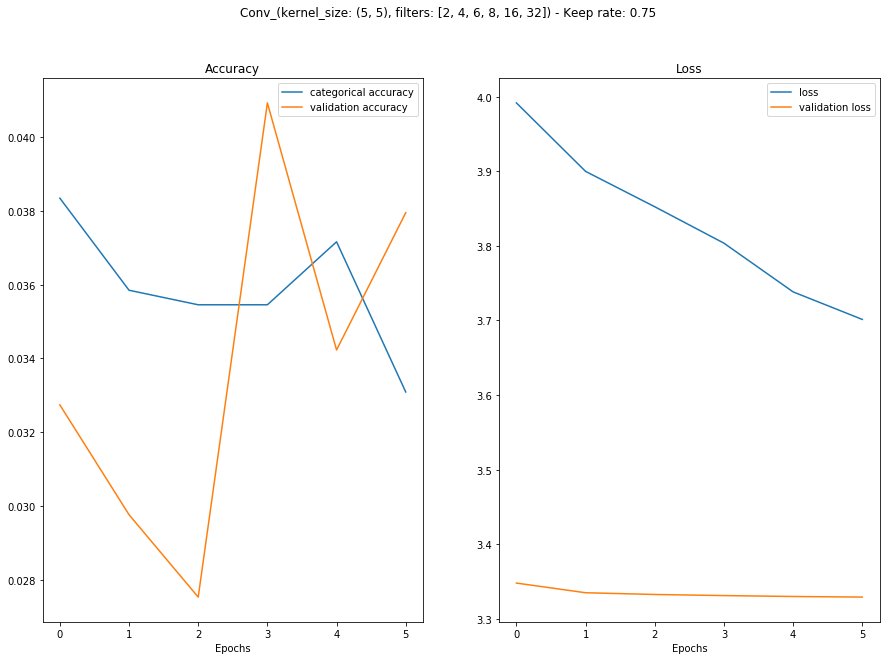

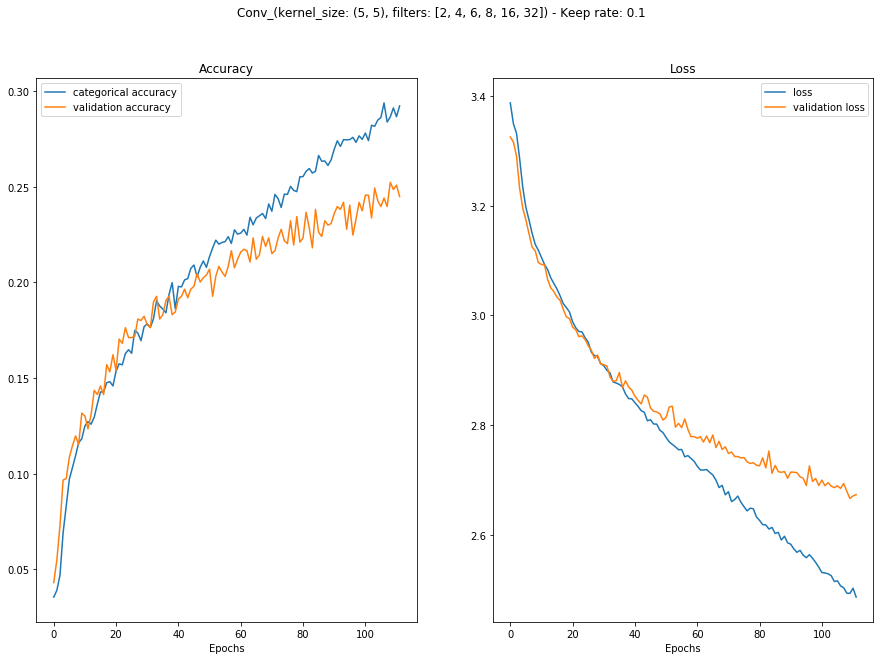

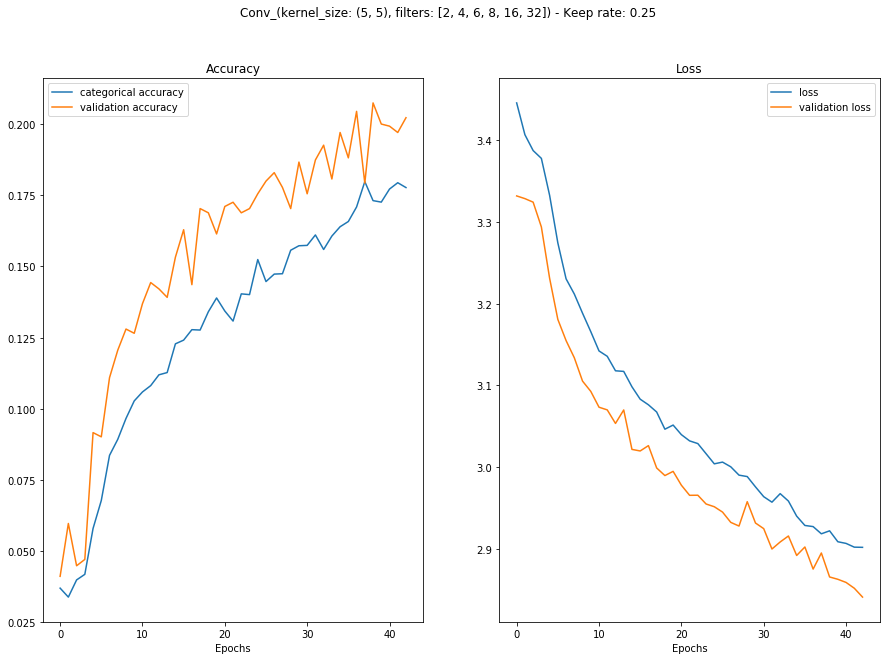

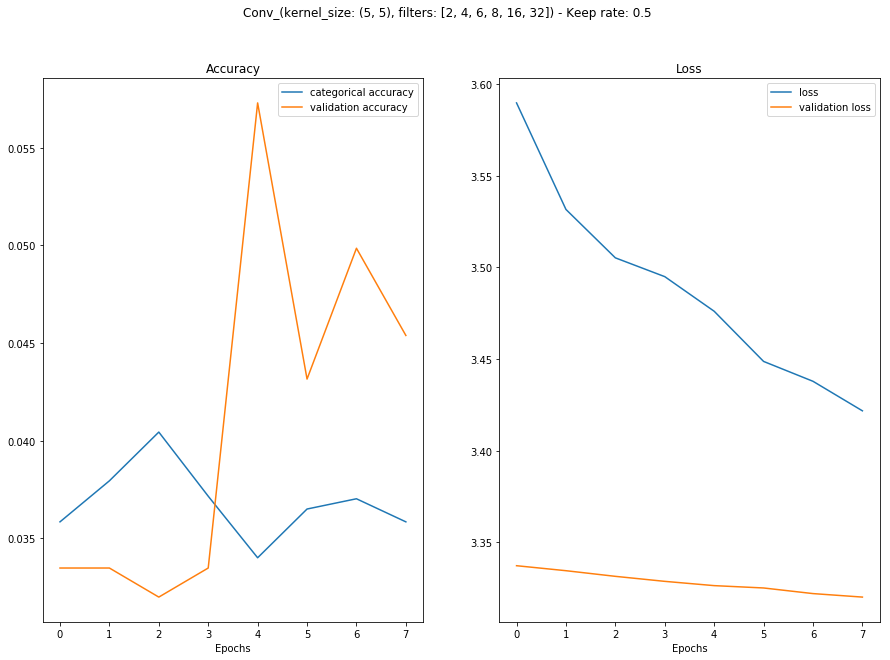

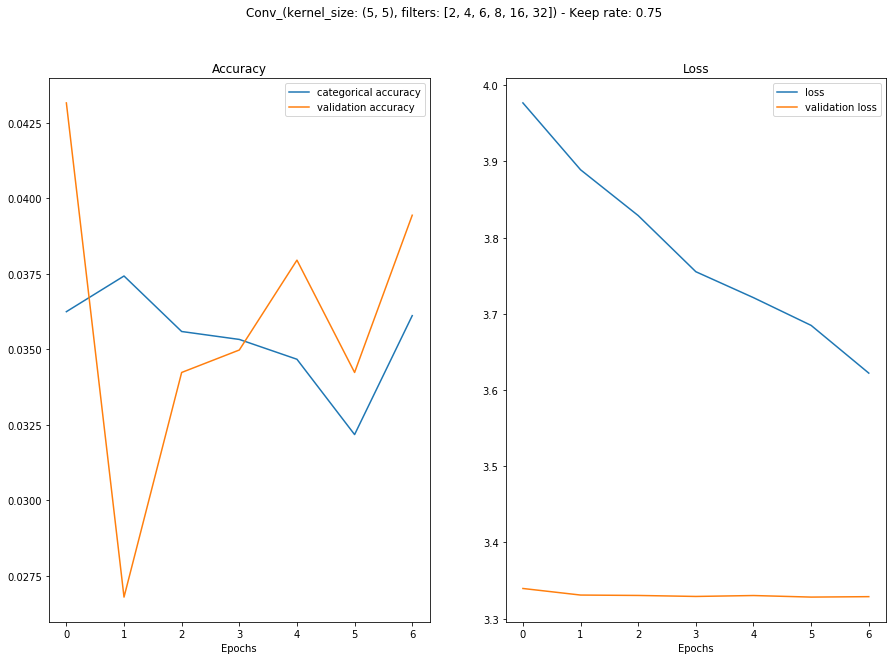

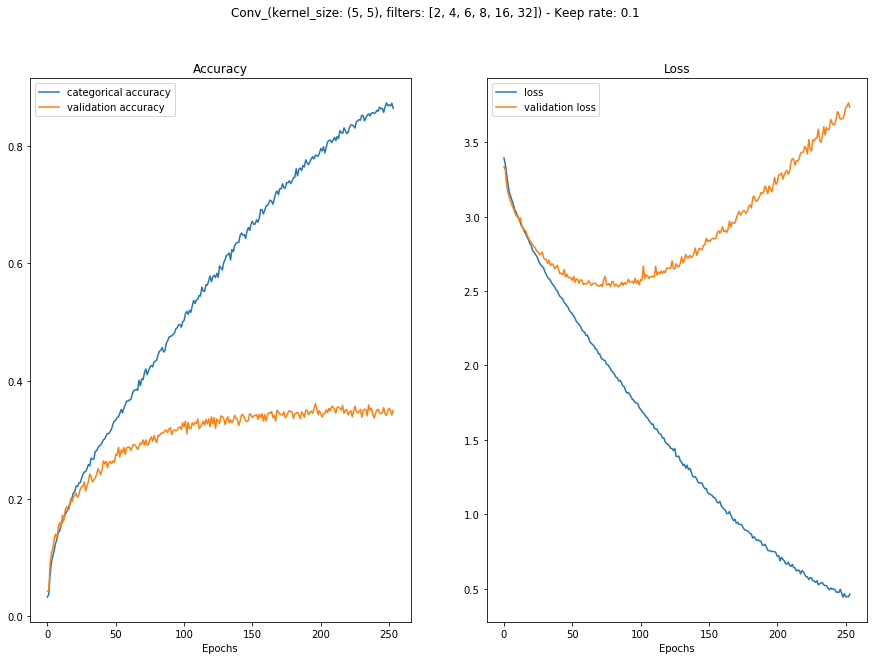

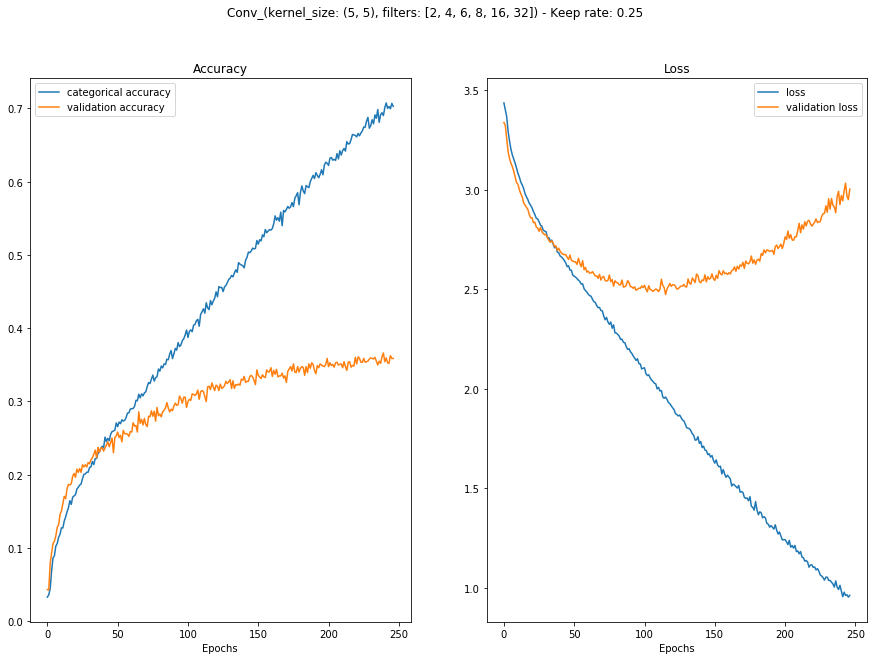

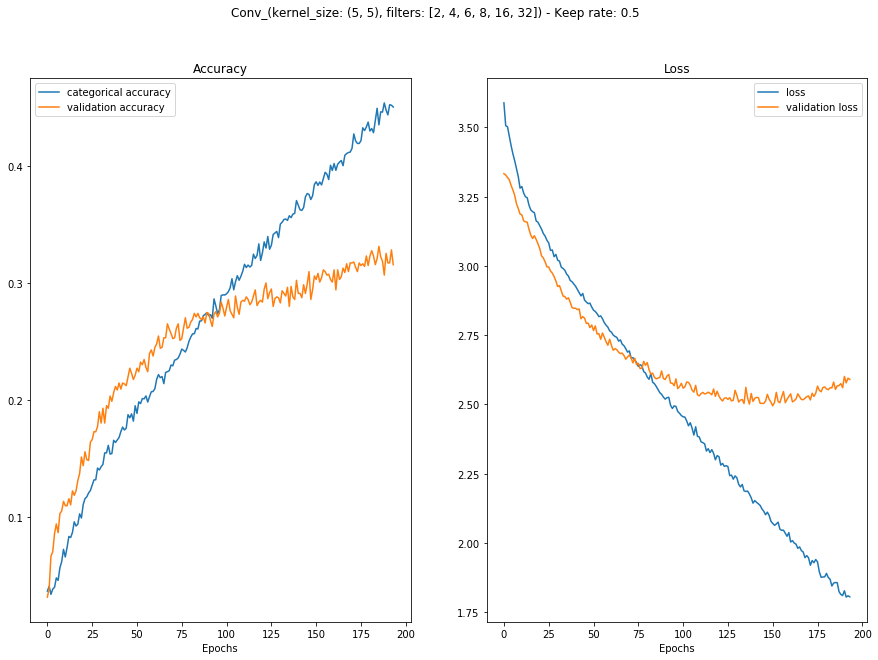

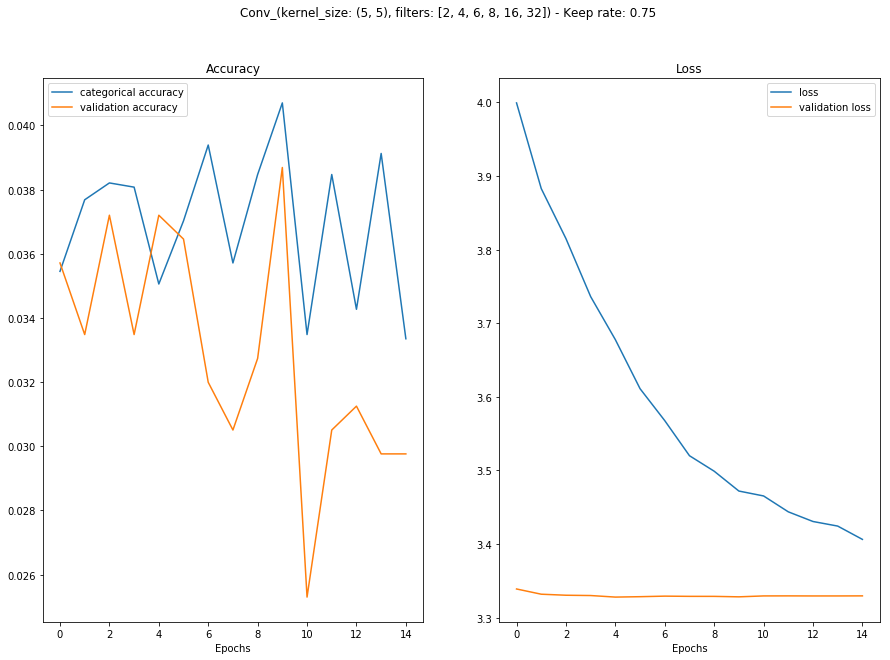

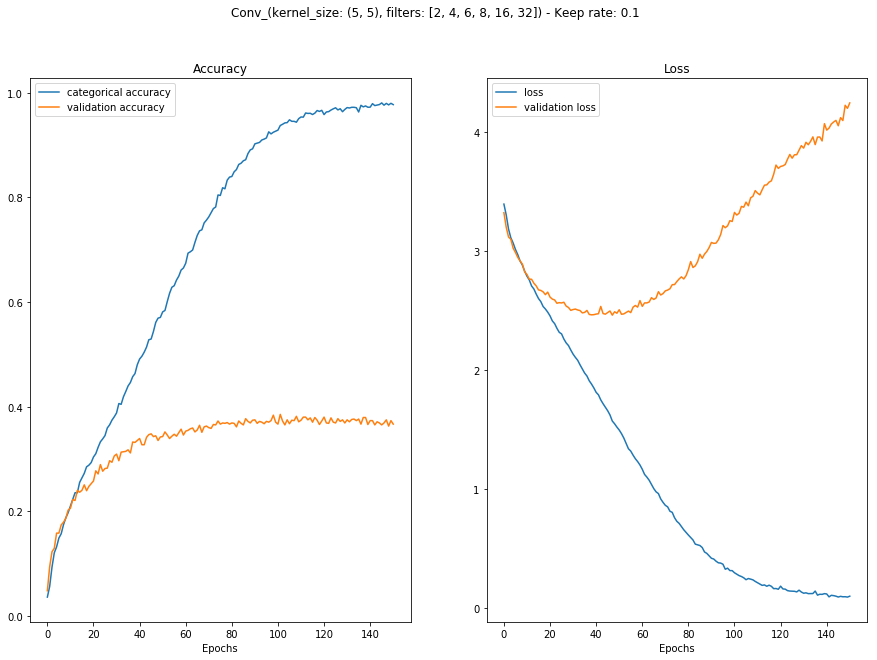

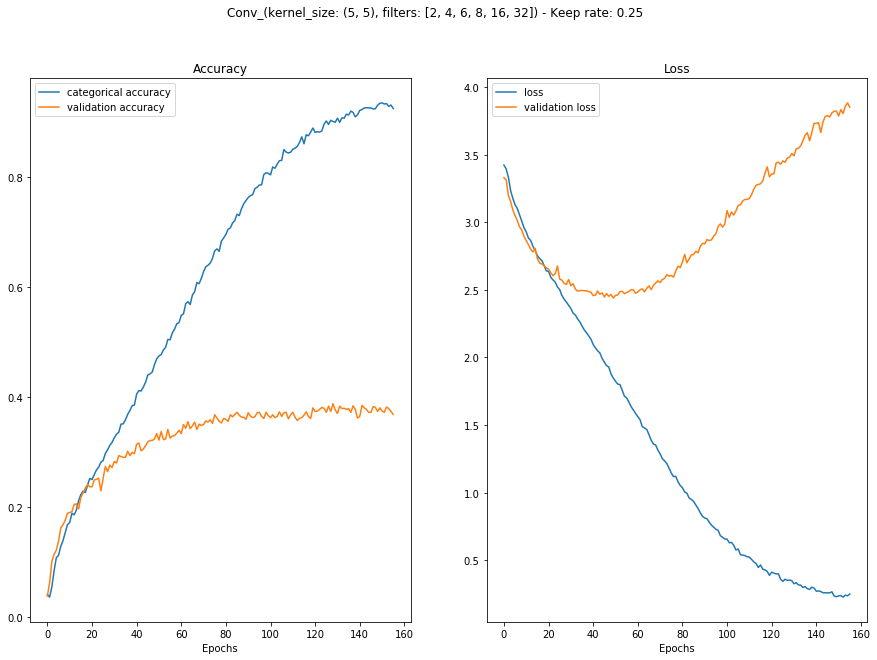

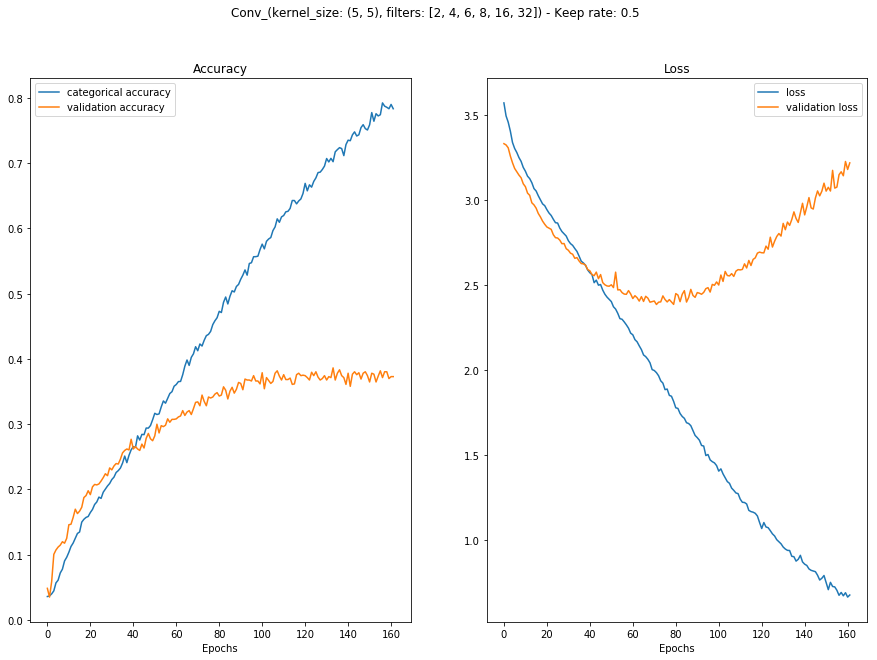

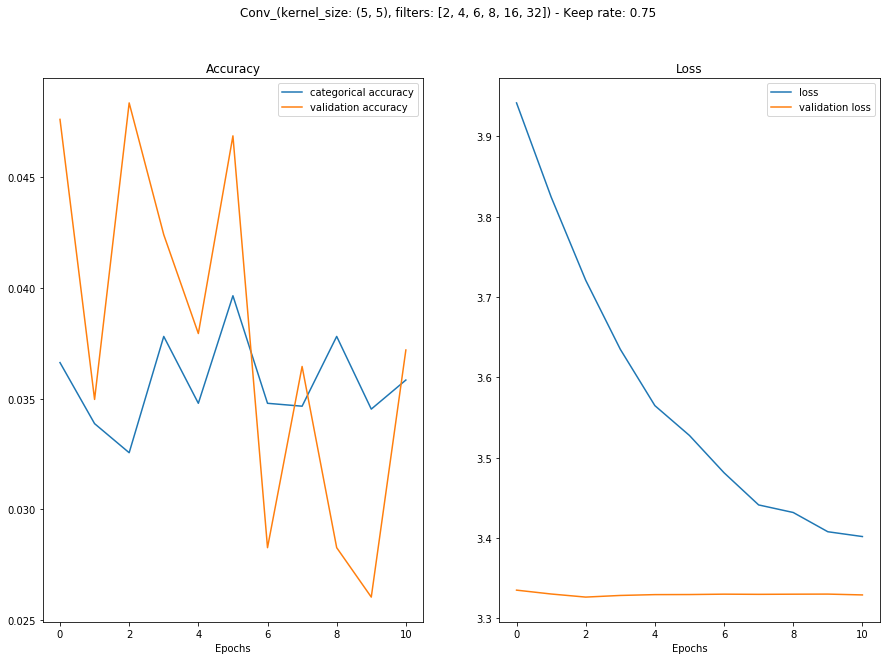

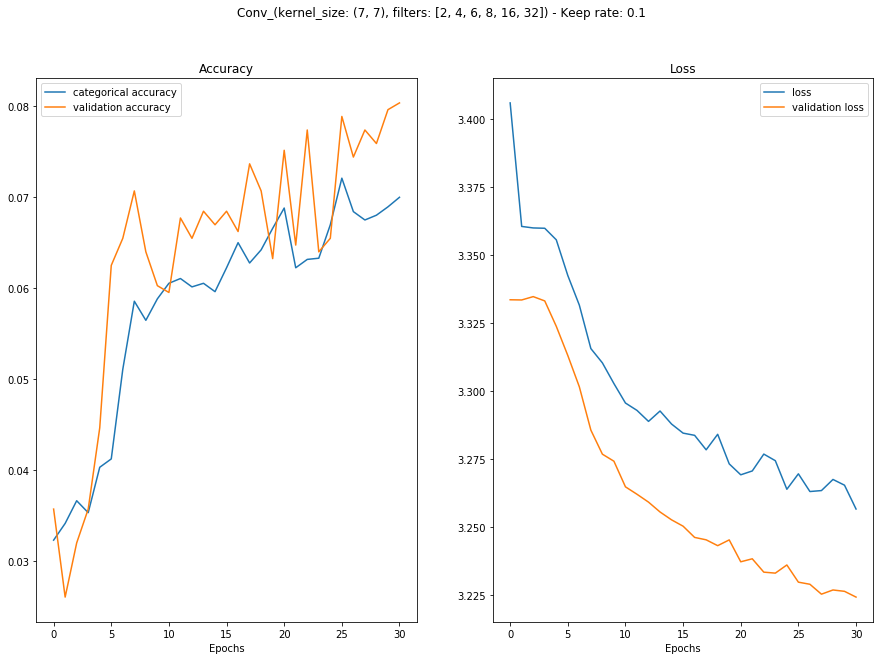

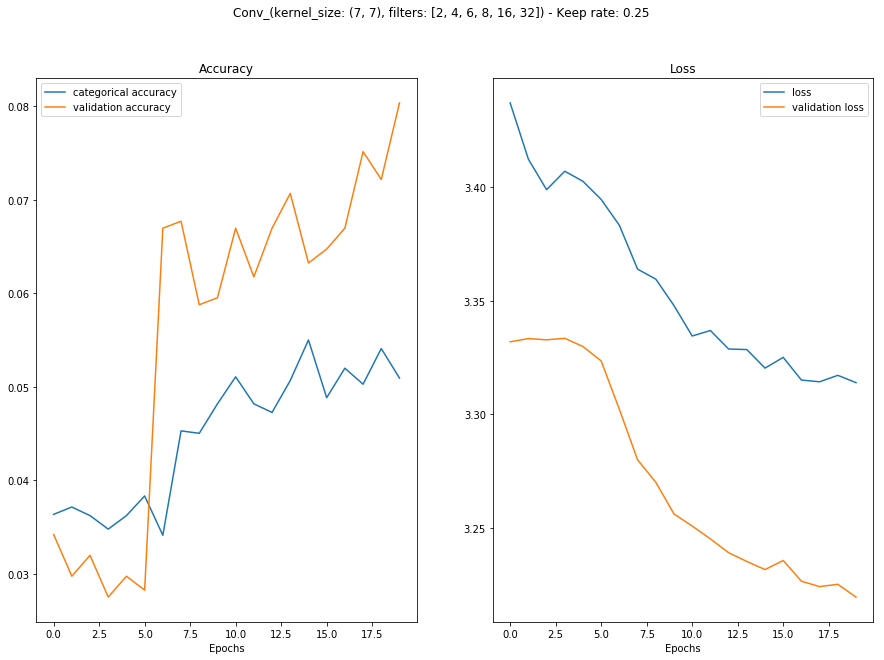

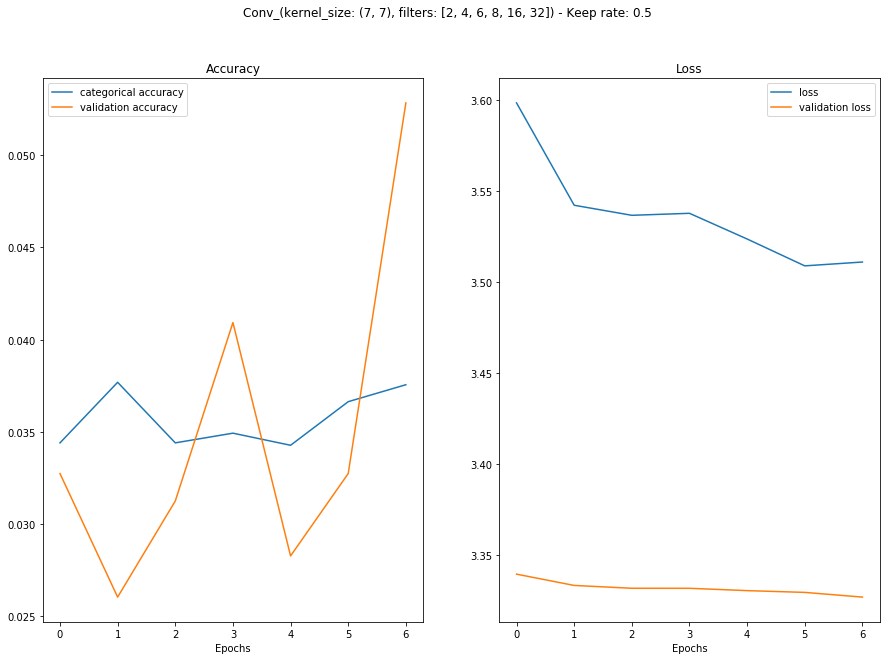

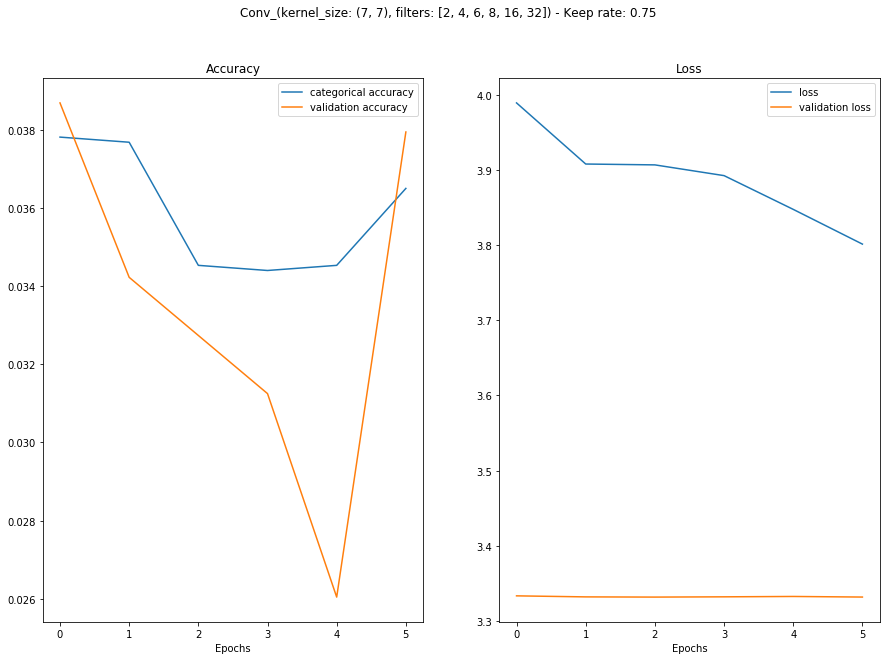

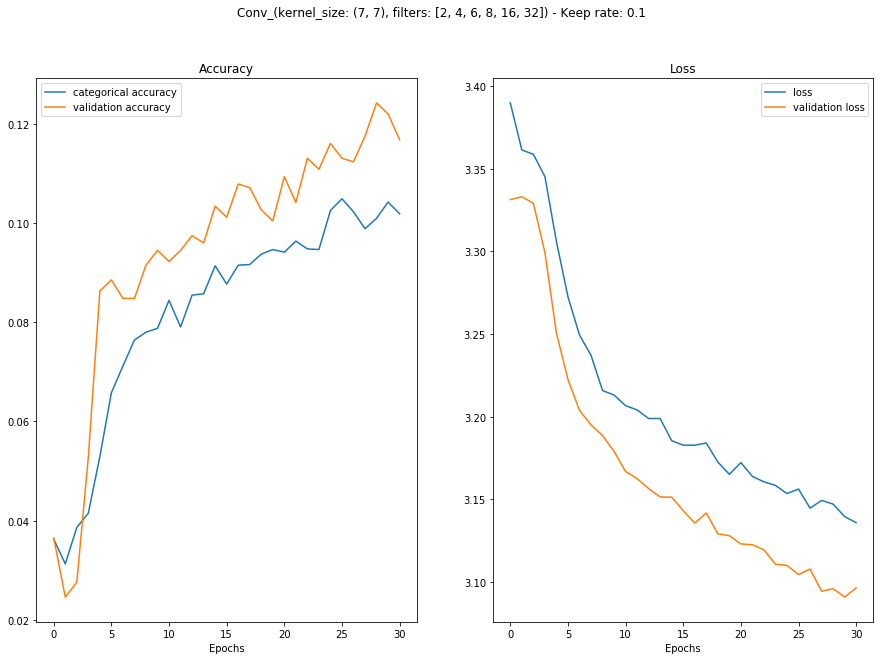

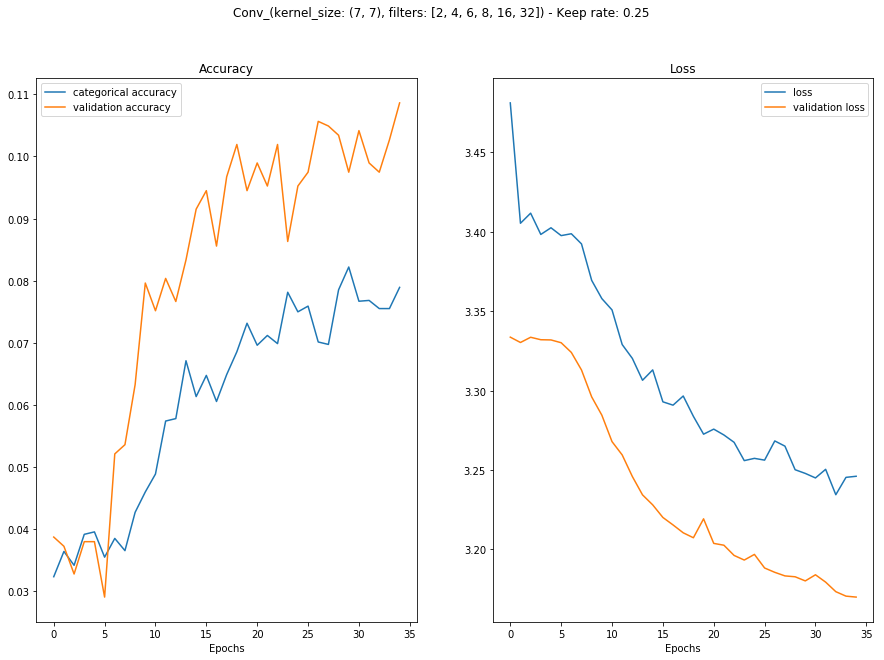

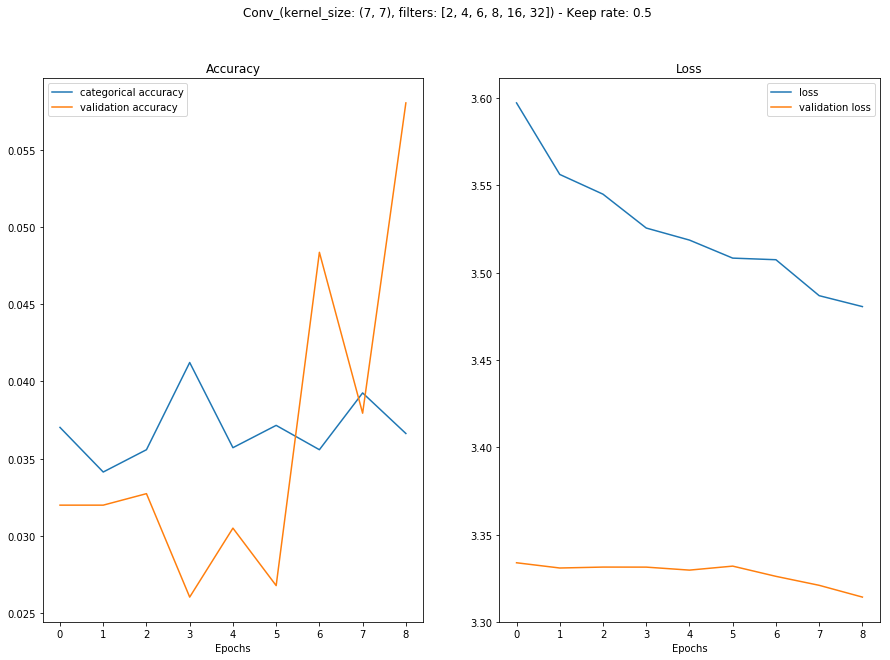

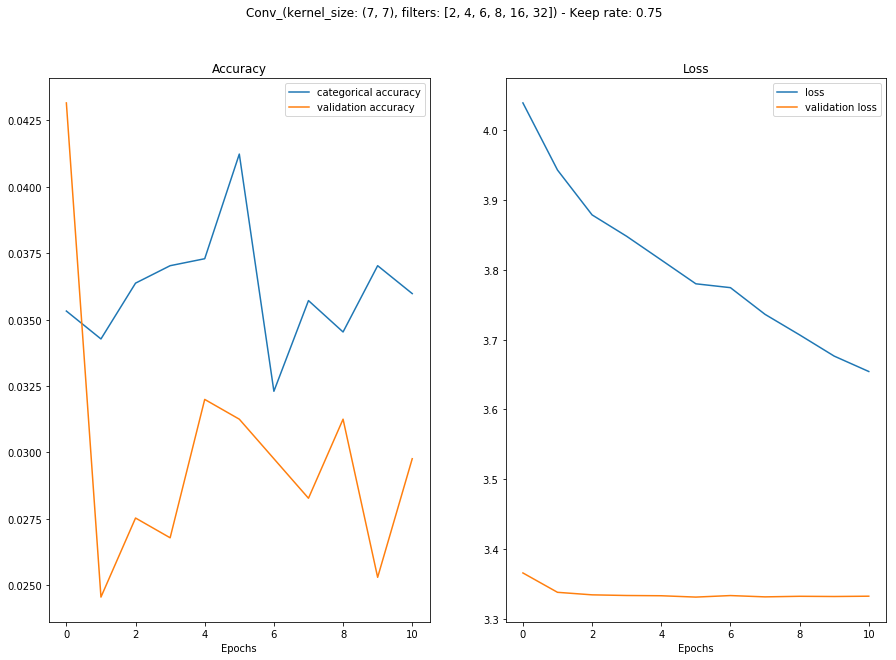

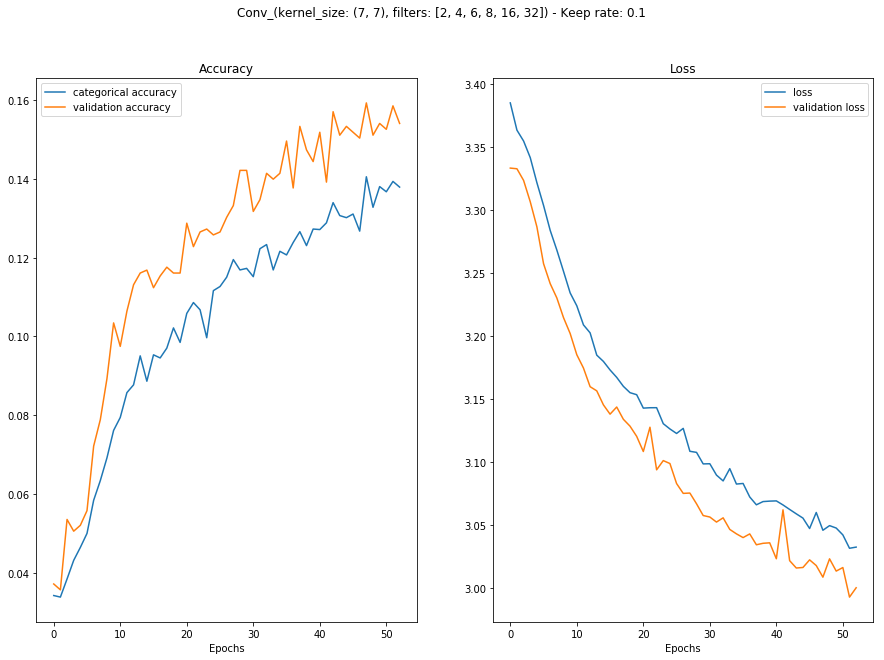

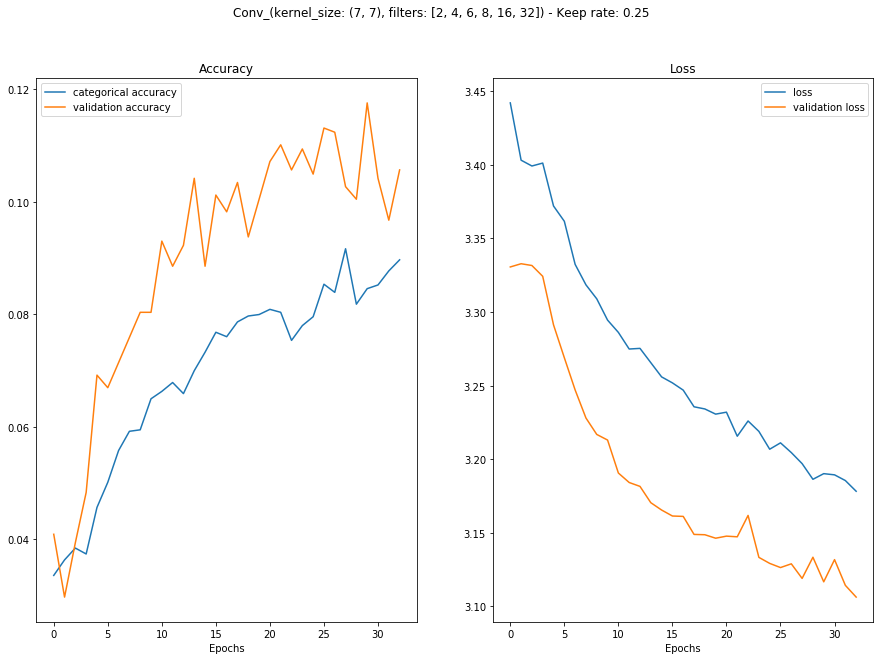

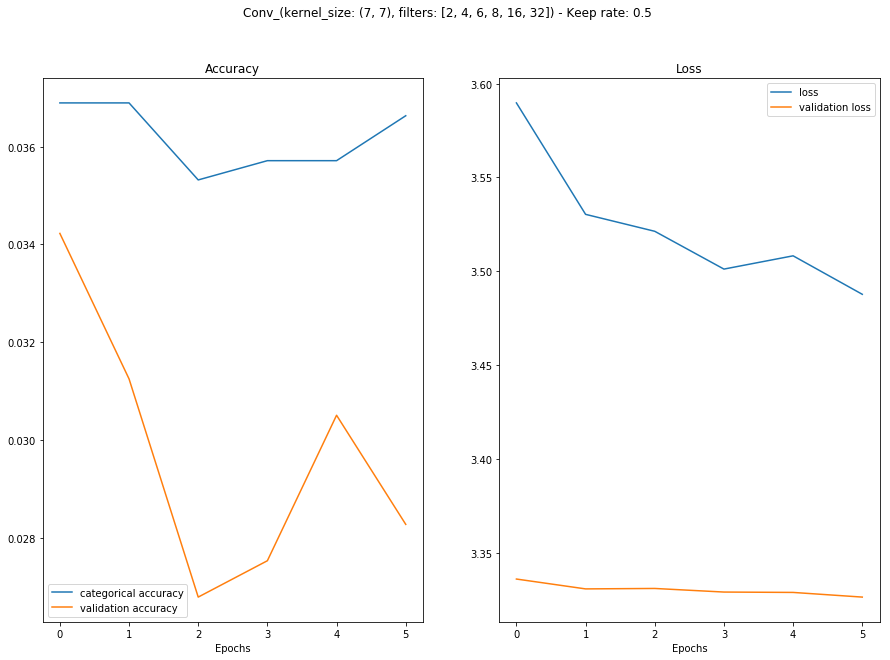

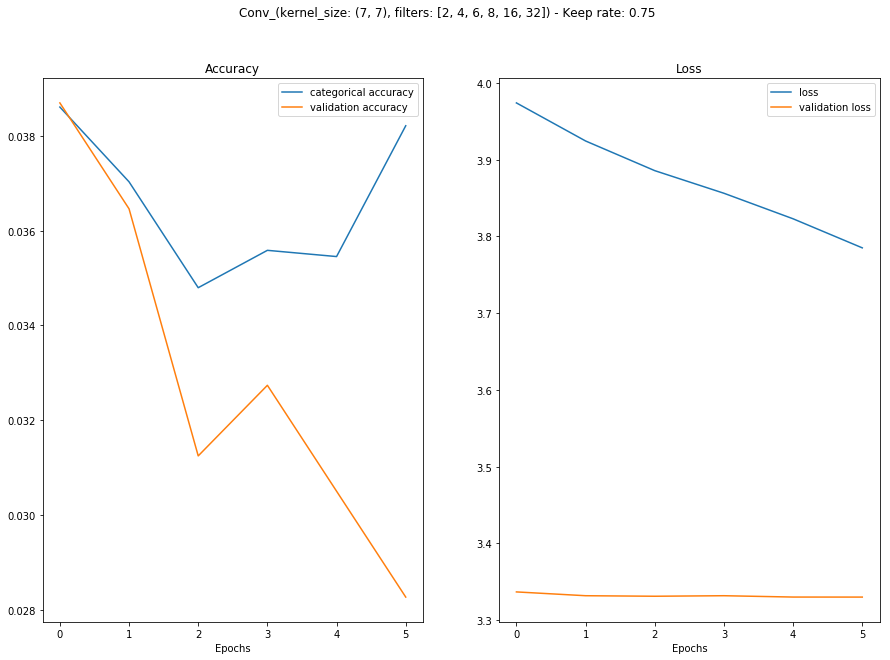

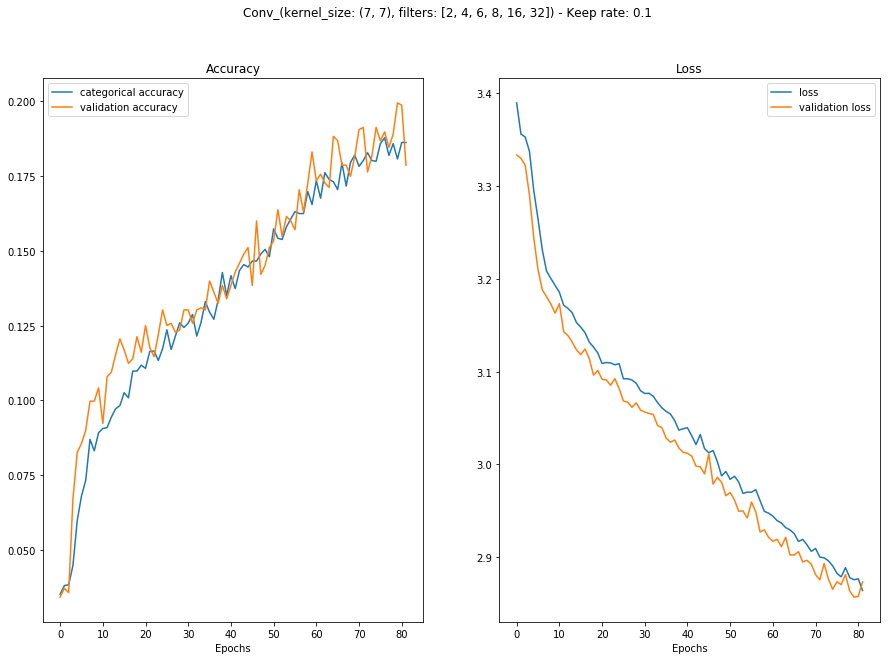

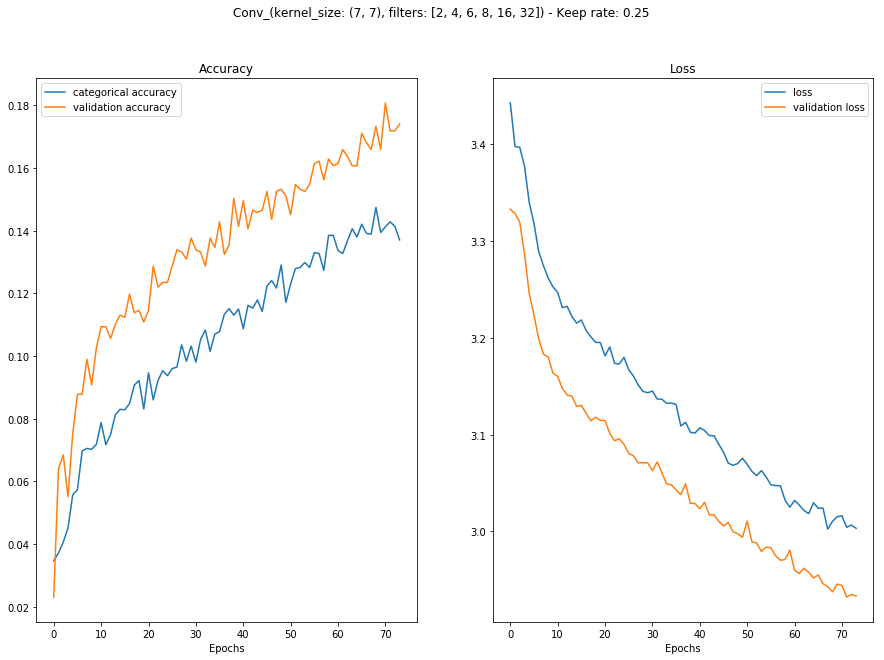

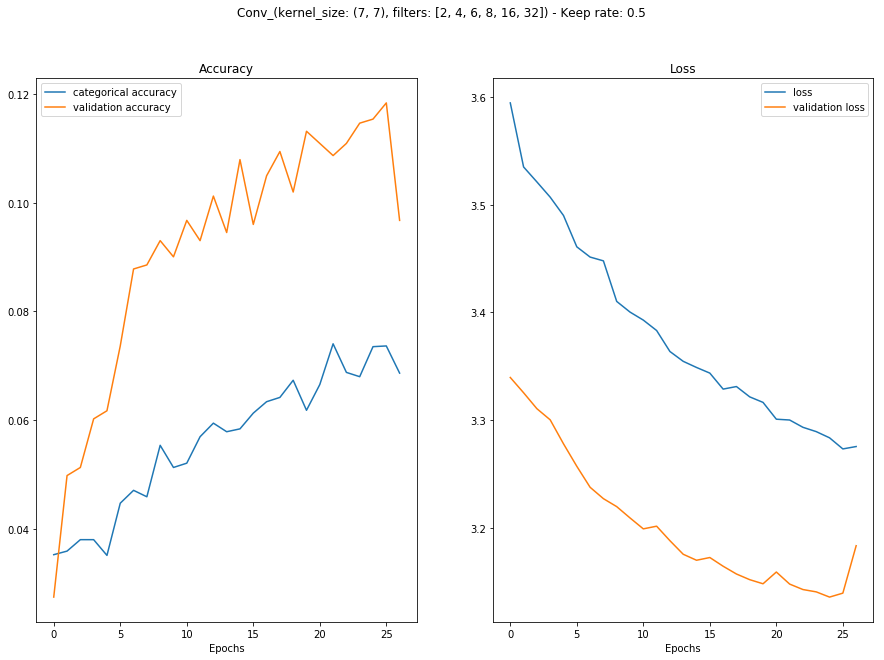

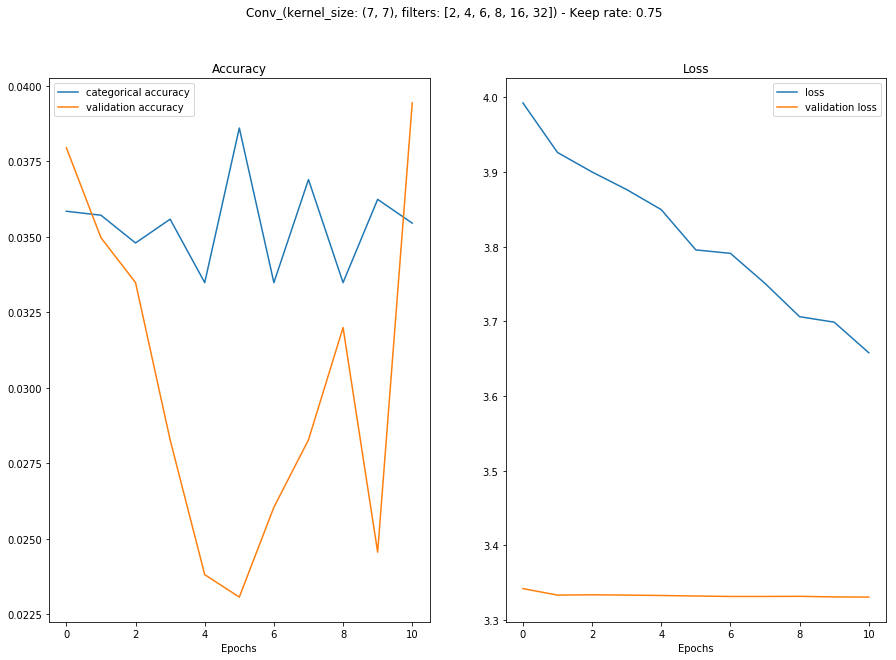

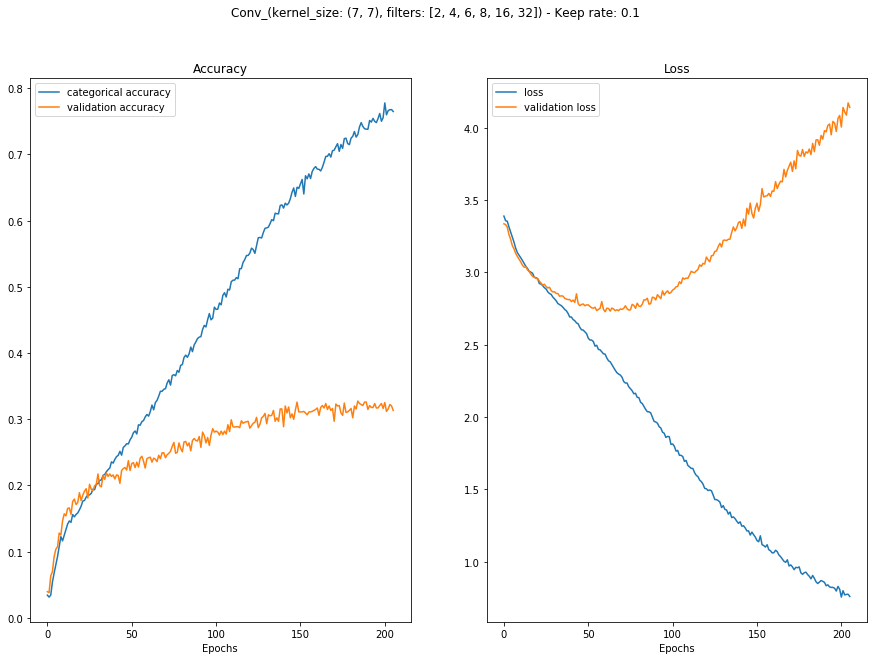

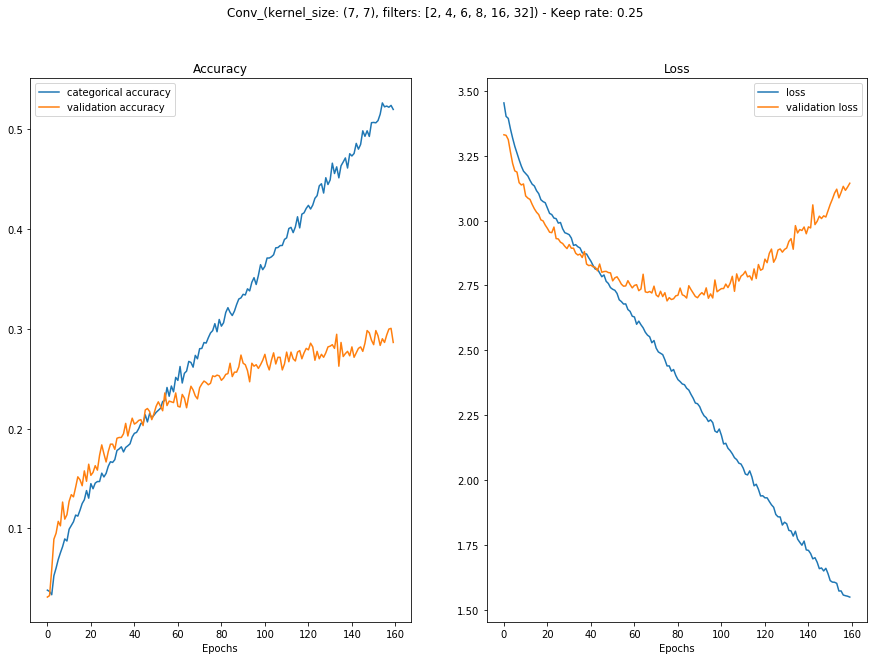

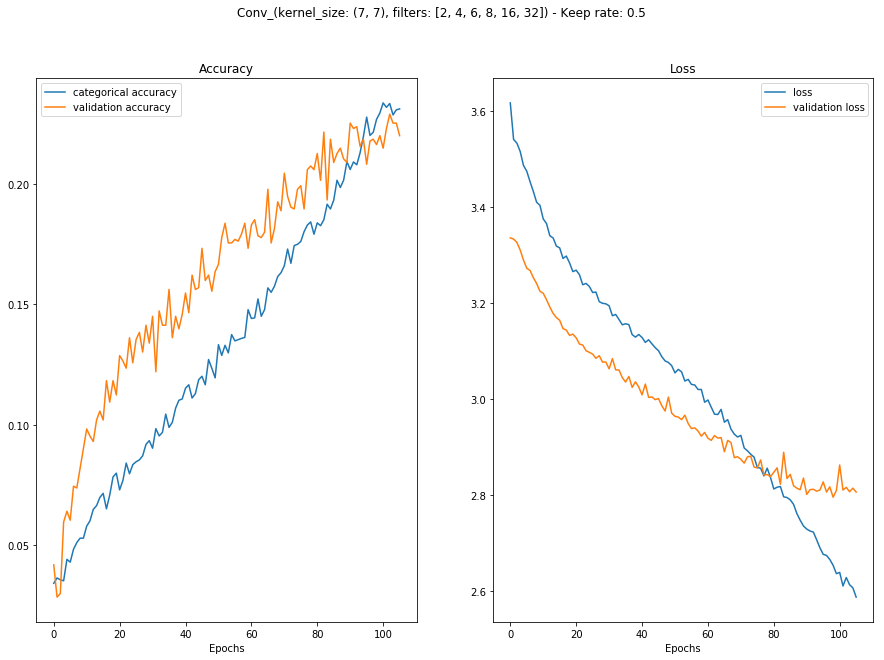

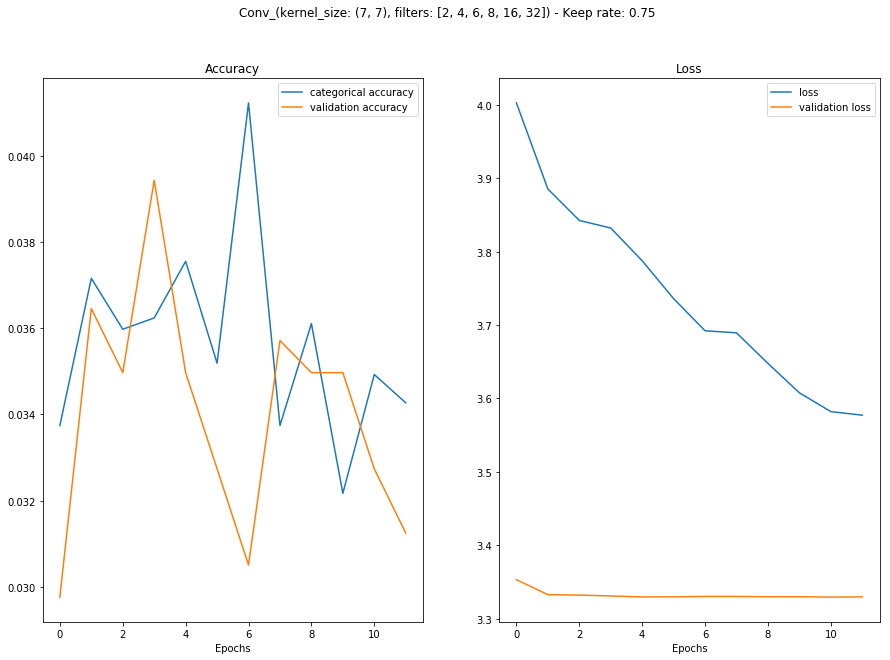

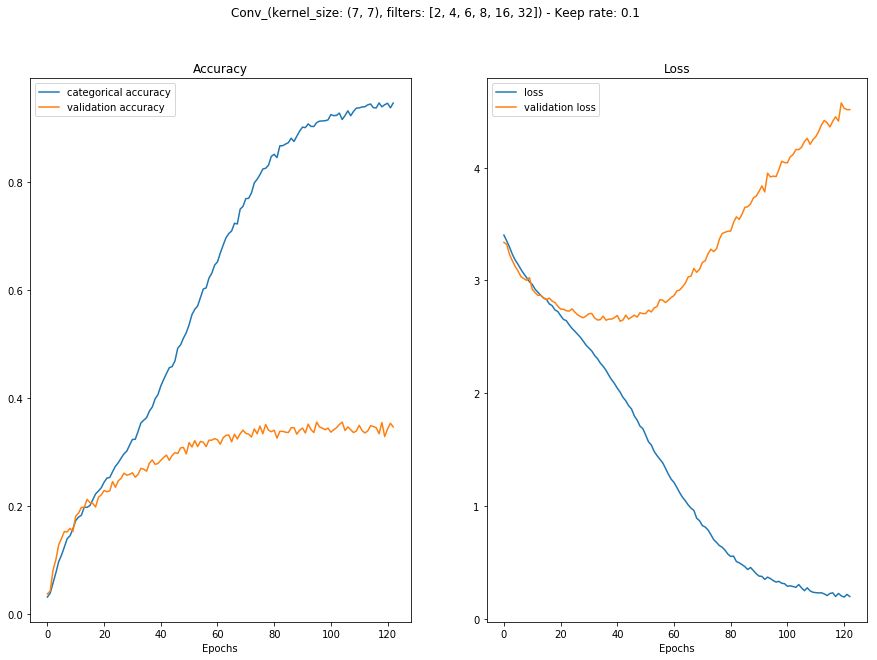

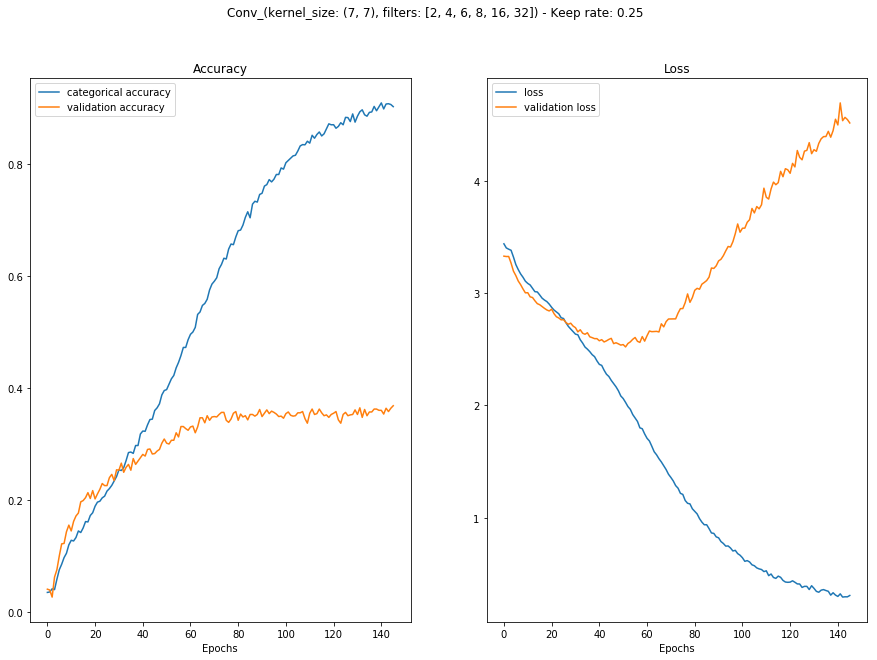

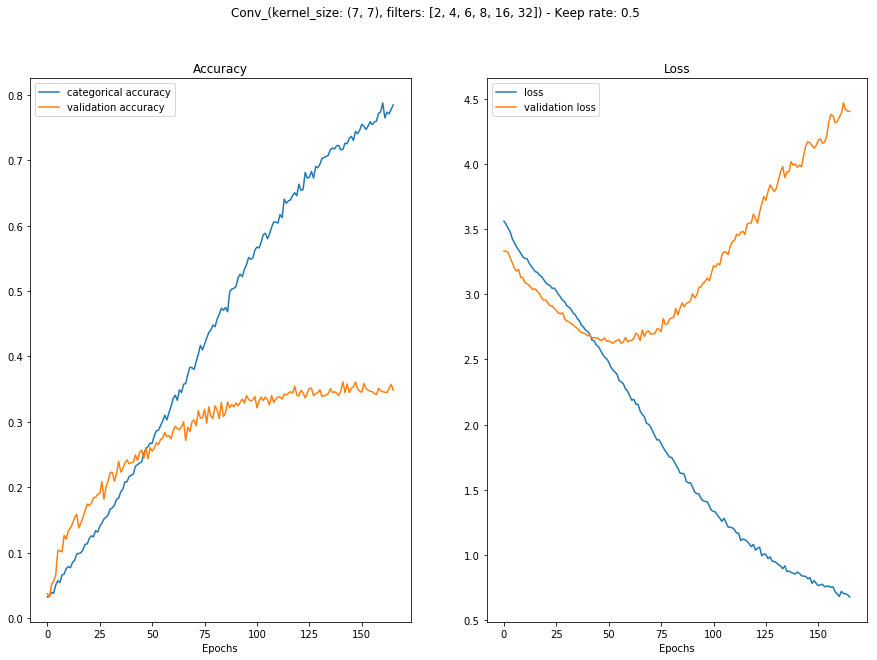

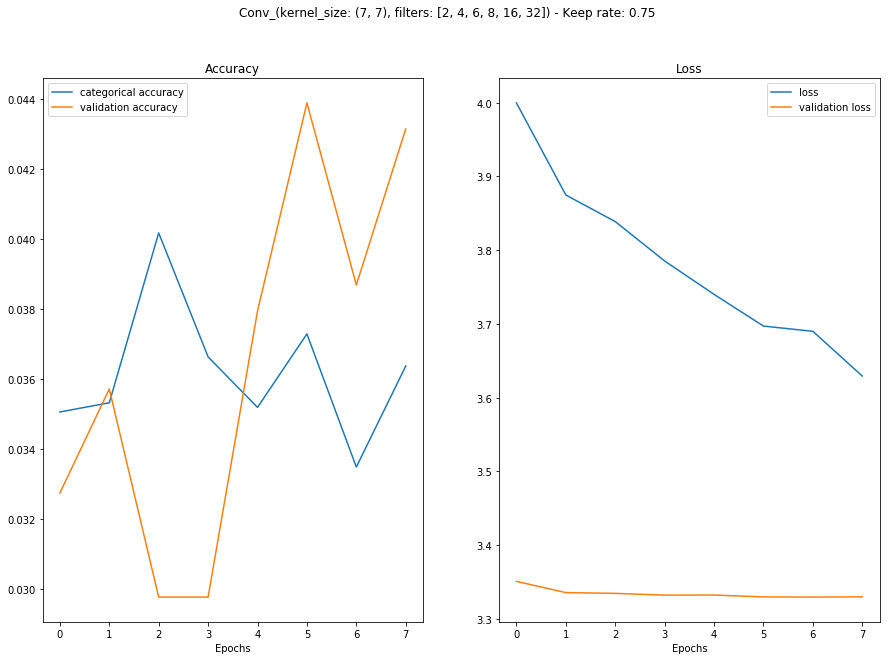

In [0]:
# model structure: conv - pool - conv - pool - fc dense - dense (output)
conv_kernel_sizes = [(3,3), (5,5), (7,7)]
conv_filterss = [2,4,6,8,16,32] #
MaxPool_pool_size = (2, 2)
MaxPool_strides = (2, 2)
keep_rates = [0.1,0.25,0.5, 0.75] #0.1,0.25,0.5
combination_poss = len(conv_kernel_sizes) * len(conv_filterss) * len(keep_rates)
print("Iters: ",combination_poss)
# (batch, height, width, channels)
index_curr_comb=1
for conv_kernel_size in conv_kernel_sizes:
    for conv_filters in conv_filterss:
        for keep_rate in keep_rates:
            model = Sequential()
            model.add(Conv2D(filters=conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='valid', activation="relu", input_shape=(height,width,1)))
            model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='valid'))

            model.add(Conv2D(filters=2*conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='valid', activation="relu"))
            model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='valid'))

            model.add(Conv2D(filters=4*conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='same', activation="relu"))
            model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='same'))

            model.add(Conv2D(filters=2*conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='same', activation="relu"))
            model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='same'))

            model.add(Conv2D(filters=conv_filters, kernel_size=conv_kernel_size, strides=(1, 1), padding='same', activation="relu"))
            model.add(MaxPool2D(pool_size=MaxPool_pool_size, strides=MaxPool_strides, padding='same'))
            model.add(Dropout(rate=keep_rate))

            model.add(Flatten())
            model.add(Dense(256, activation="sigmoid"))
            model.add(Dropout(rate=keep_rate))
            model.add(Dense(len(class_dict), activation="softmax"))

            model.compile(optimizer=Adam(lr=1e-4, decay=1e-8), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
            model.summary()

            # fit model with test data
            start_time = time.time()
            cb = EarlyStopping(monitor='categorical_accuracy', min_delta=1e-4, patience=5, verbose=2, restore_best_weights=True)
            hist = model.fit(X_final,y_final, batch_size=32, epochs=300, verbose=0, validation_split=0.15, shuffle=True, callbacks=[cb])
            ellapsed_time = (time.time() - start_time) / 60
            print("[{}/{}]Training took {} minutes.".format(index_curr_comb,combination_poss,ellapsed_time))
            model.save("../gdrive/My Drive/Colab Notebooks/CNN-animal-and-human-class_cks{}_cfs{}_kr{}.h5".format(conv_kernel_size, conv_filters, keep_rate))
            plt.figure(figsize=(15,10))
            plt.suptitle("Conv_(kernel_size: {}, filters: {}) - Keep rate: {}".format(conv_kernel_size, conv_filters, keep_rate))
            plt.subplot(1,2,1)
            plt.plot(hist.history["categorical_accuracy"], label="categorical accuracy")
            plt.plot(hist.history["val_categorical_accuracy"], label="validation accuracy")
            plt.legend(loc="best")
            plt.xlabel("Epochs")
            plt.title("Accuracy")
            plt.subplot(1,2,2)
            plt.plot(hist.history["loss"], label="loss")
            plt.plot(hist.history["val_loss"], label="validation loss")
            plt.legend(loc="best")
            plt.xlabel("Epochs")
            plt.title("Loss")
            plt.savefig("../gdrive/My Drive/Colab Notebooks/train_res_CNN-animal-and-human-class_cks{}_cfs{}_kr{}.png".format(conv_kernel_size, conv_filters, keep_rate))
            plt.close()
            index_curr_comb += 1
print("Finished!")

In [0]:
import os
folder = "../gdrive/My Drive/Colab Notebooks"
list_dir = os.listdir(folder)
model_list = []
for item in list_dir:
    if item.lower().split(".")[-1] == "h5":
        model_list.append(item)
print(model_list)

print(X_final.shape, y_final.shape)

['2019_07_07_cnn_conv_pool_conv_pool_drop_flatten_dense_dense_acc_0.7896.h5', 'CNN-animal-class_keep-rate0.1.h5', 'CNN-animal-class_keep-rate0.5.h5', 'CNN-animal-class_keep-rate0.9.h5', 'CNN-animal-class_keep-rate0.25.h5', 'CNN-animal-class_kernel-size(3, 3).h5', 'CNN-animal-class_kernel-size(5, 5).h5', 'CNN-animal-class_kernel-size(7, 7).h5', '2019_07_07_cnn_conv_pool_conv_pool_drop_flatten_dense_dense_acc_0.8850.h5', 'CNN-animal-class_conv_filter-size32.h5', 'CNN-animal-class_conv_filter-size16.h5', 'CNN-animal-class_conv_filter-size8.h5', 'CNN-animal-class_conv_filter-size4.h5', 'CNN-animal-class_conv_filter-size2.h5', '2019_07_07_cnn_conv_pool_conv_pool_drop_flatten_dense_dense_acc_0.9036_overfitting.h5', 'CNN-animal-class_cks(3, 3)_cfs8_kr0.25.h5', 'CNN-animal-class_cks(3, 3)_cfs32_kr0.25.h5', '2019_07_07_cnn_conv_pool_conv_pool_drop_flatten_dense_dense_acc_0.7203_animals_and_humans_overfitting.h5', 'CNN-animal-class_cks(3, 3)_cfs2_kr0.1.h5', 'CNN-animal-and-human-class_cks(3, 3)_

W0806 17:16:37.678033 140167383160704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 17:16:37.722129 140167383160704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 17:16:37.748787 140167383160704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0806 17:16:37.806164 140167383160704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 17:16:37.807417 140167383160704 deprecation_wrap

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 46, 46, 16)        416       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 19, 19, 32)        12832     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 5, 5, 32)          51232     
__________

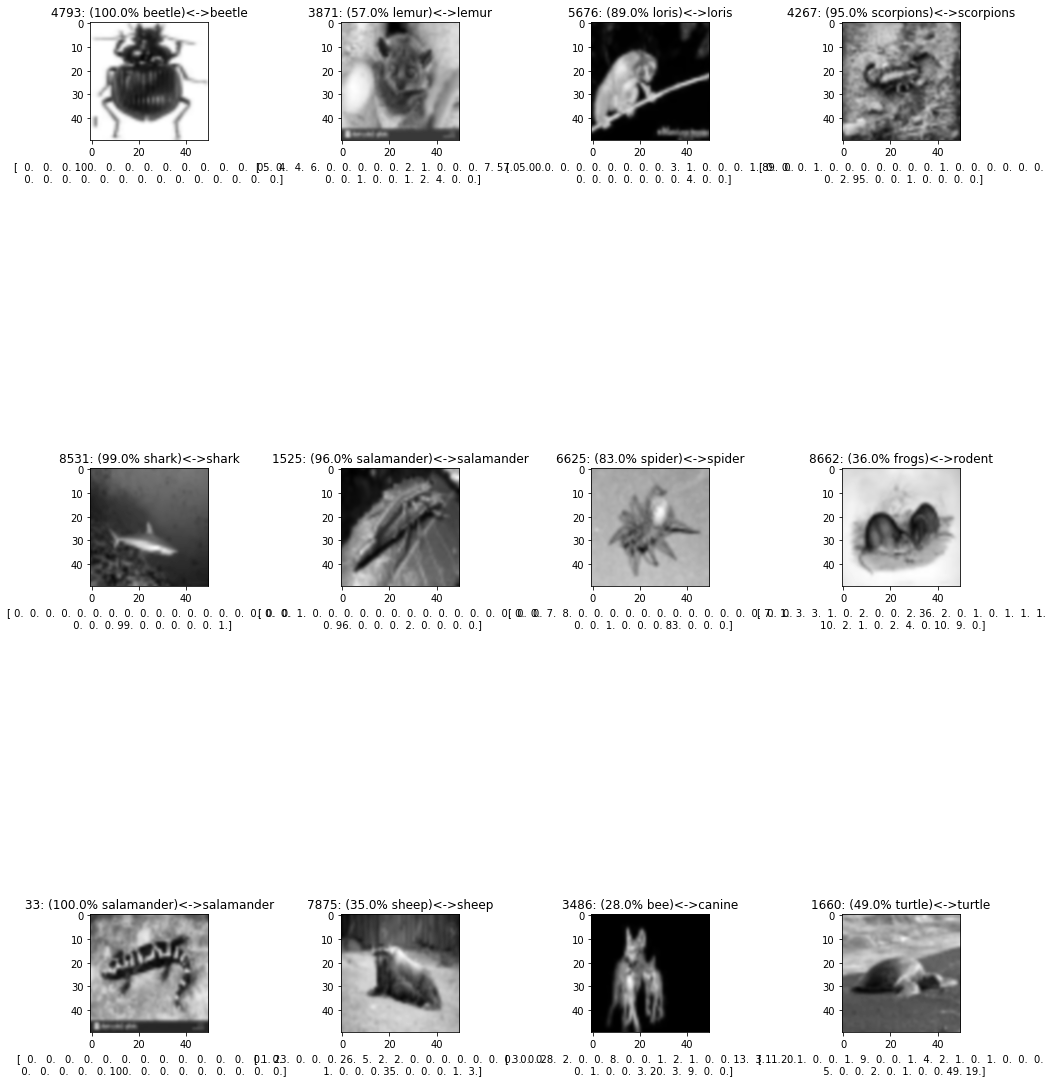

In [0]:
folder = "../gdrive/My Drive/Colab Notebooks"
model = keras.models.load_model(os.path.join(folder, str(model_list[-1]) ))
model.summary()

amount_test = 12
amount_cols = 4
fig, ax = plt.subplots(amount_test//amount_cols, amount_cols, figsize=(14,20))
# print(ax.shape)
correct_pred = 0
for i in range(amount_test//amount_cols):
    rand_id = np.random.choice(X_final.shape[0],amount_cols, replace=False)
#     print(rand_id)
    for number, id in enumerate(rand_id):
        t_img = X_final[id,:,:,0].reshape(1,50,50,1)
        pred = model.predict_classes(t_img, verbose=0)
        pred_ = model.predict(t_img, verbose=0)
        if class_dict[pred[0]] == class_dict[np.argmax(y_final[id,:])]:
            correct_pred += 1
        ax[i,number].imshow(X_final[id,:,:,0], cmap="gray", interpolation="bicubic")
        ax[i,number].set_title("{}: ({}% {})<->{}".format(id,
                                                         np.round(pred_[0][pred][0]*100, decimals=0),
                                                         class_dict[pred[0]],
                                                         class_dict[np.argmax(y_final[id,:])]
                                                        ))
        ax[i,number].set_xlabel("{}".format(np.round(pred_[0], decimals=2)*100))
fig.tight_layout()
print("{} of {}".format(correct_pred,amount_test))

In [0]:
# cm = confusion_matrix(np.argmax(y_final[id,:]), np.argmax(pred_[0]))
print(np.argmax(pred_[0]),"\n", np.argmaxy_final[id,:])

TypeError: ignored

In [0]:
try:
    score = model.evaluate_generator(datagen.flow(X_final, y_final, batch_size=32), steps=1000, max_queue_size=20, workers=10, verbose=1)
except Exception as E:
    print(E)
else:
    score = model.evaluate(X_final, y_final, verbose=1, batch_size=32)
finally:
    print("{}: {} / {}: {}".format(model.metrics_names[0],score[0], model.metrics_names[1], score[1]))

8960/8960 [==============================] - 1s 146us/step
loss: 0.646122597264392 / categorical_accuracy: 0.8127232142857143


In [0]:
import json
model_identifier = "2019_07_07_cnn_conv_pool_conv_pool_drop_flatten_dense_dense_acc_0.7203_animals_and_humans_overfitting"
model.save("../gdrive/My Drive/Colab Notebooks/{}.h5".format(model_identifier))
with open("../gdrive/My Drive/Colab Notebooks/{}_classes.txt".format(model_identifier),"w") as f:
    json.dump(class_dict, f)
f.close()

### What does the cnn see? What has the model learned?

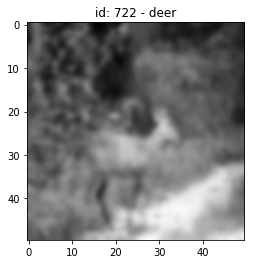

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


IndexError: ignored

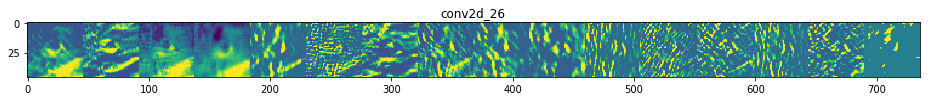

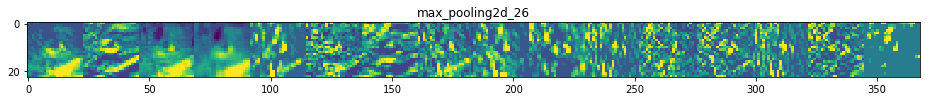

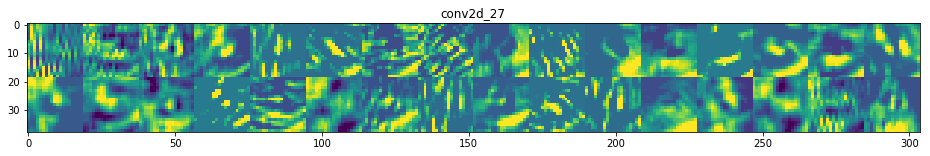

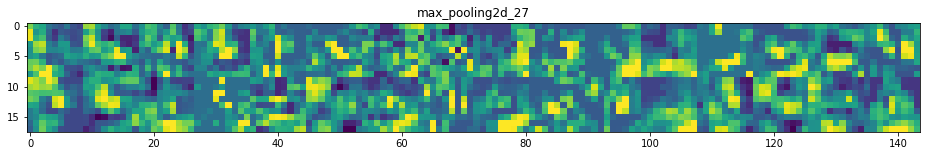

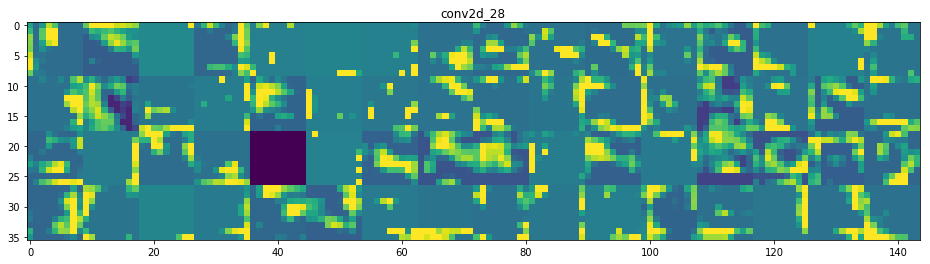

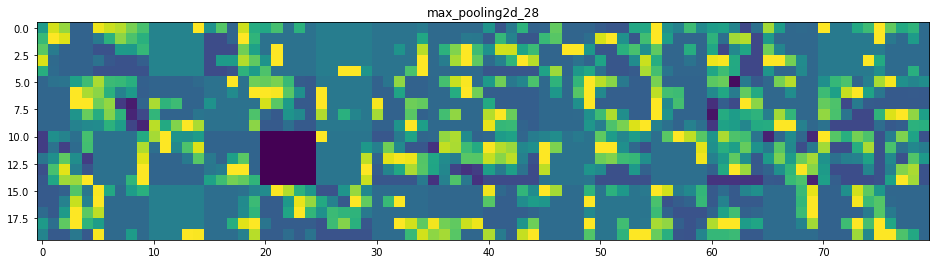

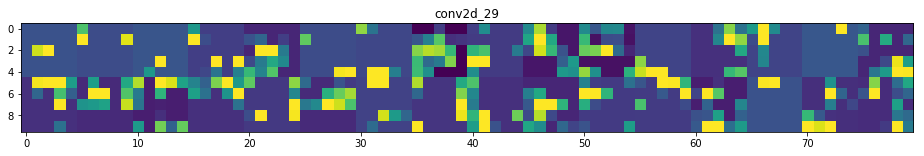

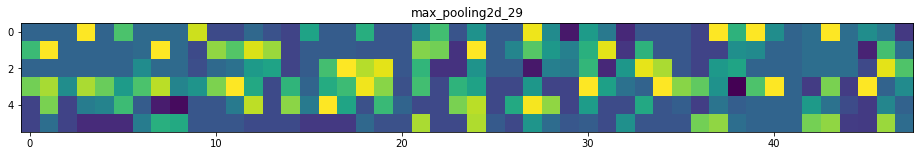

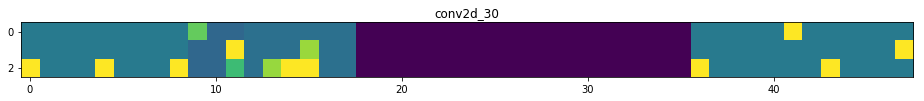

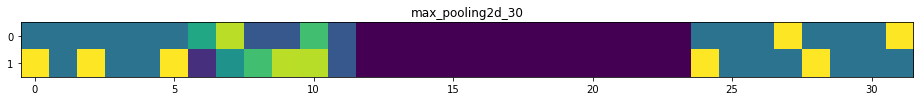

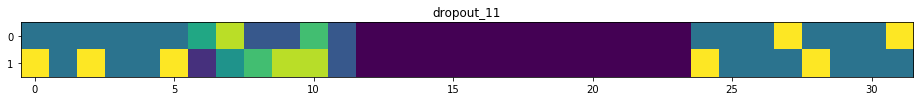

In [0]:
from keras.layers import Model

layer_outputs = [layer.output for layer in model.layers[:12]]
# Extracts the outputs of the top 12 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)
# Creates a model that will return these outputs, given the model input
sdf = np.random.randint(X_final.shape[0])
img_tensor = X_final[sdf,:,:,0].reshape(1,50,50,1)
plt.figure()
plt.imshow(X_final[sdf,:,:,0], cmap="gray", interpolation="bicubic")
plt.title("id: {} - {}".format(sdf, class_dict[np.argmax(y_final[sdf])]))
plt.show()
activations = activation_model.predict(img_tensor)
# Returns a list of five Numpy arrays: one array per layer activation

layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
layer_names

['conv2d_21',
 'max_pooling2d_21',
 'conv2d_22',
 'max_pooling2d_22',
 'conv2d_23',
 'max_pooling2d_23',
 'conv2d_24',
 'max_pooling2d_24',
 'conv2d_25',
 'max_pooling2d_25',
 'dropout_8',
 'flatten_4']